In [1]:
"""V2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1flYlnIDLueQ4vUMmxxz87MeRCA8lHVWn

Predicting California Real Estate Price

Context: Buying a home is one of the most important decisions you make over the course
of your lifetime. The decision significantly impacts quality of life and can be
a profitable investment. Predicting what the cost of a home is based on certain details
and elements of the house would help to make a smarter decision when looking to purchase.
With this ability, the average family would be able to get the most out of their investment
given their budget. In this report, we strive to empower the buyer and provide further
insight into predicting how much a home costs in California.

Our dataset comes from Kaggle and can be found at:

https://www.kaggle.com/yellowj4acket/real-estate-california
"""

'V2.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1flYlnIDLueQ4vUMmxxz87MeRCA8lHVWn\n\nPredicting California Real Estate Price\n\nContext: Buying a home is one of the most important decisions you make over the course\nof your lifetime. The decision significantly impacts quality of life and can be \na profitable investment. Predicting what the cost of a home is based on certain details\nand elements of the house would help to make a smarter decision when looking to purchase.\nWith this ability, the average family would be able to get the most out of their investment \ngiven their budget. In this report, we strive to empower the buyer and provide further \ninsight into predicting how much a home costs in California.\n\nOur dataset comes from Kaggle and can be found at: \n\nhttps://www.kaggle.com/yellowj4acket/real-estate-california\n'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
"""import sys
from pathlib import Path
from zipfile import ZipFile"""

Mounted at /content/drive


'import sys\nfrom pathlib import Path\nfrom zipfile import ZipFile'

In [4]:
path = "/content/drive/MyDrive/data_science_projects/Predicting California Real Estate Price/RealEstate_California.csv"

df = pd.read_csv(path)

In [5]:
df['is_bankOwned'] = df['is_bankOwned'].map({1: 'yes', 0: 'no'})
df['is_forAuction'] = df['is_forAuction'].map({1: 'yes', 0: 'no'})
df['hasBadGeocode'] = df['hasBadGeocode'].map({1: 'yes', 0: 'no'})
df['hasGarage'] = df['hasGarage'].map({1: 'yes', 0: 'no'})
df['pool'] = df['pool'].map({1: 'yes', 0: 'no'})
df['spa'] = df['spa'].map({1: 'yes', 0: 'no'})
df['isNewConstruction'] = df['isNewConstruction'].map({1: 'yes', 0: 'no'})
df['hasPetsAllowed'] = df['hasPetsAllowed'].map({1: 'yes', 0: 'no'})

In [6]:
"""The research question we want to answer is:

On average, do houses that are built before 1980 with four bedrooms cost more than
houses that were built in or after 1980 with 3 bedrooms?

We are curious as to what costs more in the housing market from our sample.
Does an older and slightly bigger house cost more than a newer and slightly smaller house?"""

'The research question we want to answer is:\n\nOn average, do houses that are built before 1980 with four bedrooms cost more than \nhouses that were built in or after 1980 with 3 bedrooms?\n\nWe are curious as to what costs more in the housing market from our sample.\nDoes an older and slightly bigger house cost more than a newer and slightly smaller house?'

In [7]:
"""To observe the average of our two sample populations, we will use the following code to
make variables "before" and "after"""

before = df[df["yearBuilt"] < 1980]
before = df[df["bedrooms"] == 4]


after = df[df["yearBuilt"] >= 1980]
after = df[df["bedrooms"] == 3]

In [8]:
before.shape

(7228, 39)

In [9]:
"""There are 7,228 houses in the before sample population"""

'There are 7,228 houses in the before sample population'

In [10]:
after.shape

(10911, 39)

In [11]:
"""There are 10,911 houses in the after sample population"""

'There are 10,911 houses in the after sample population'

In [13]:
"""Now let's find the average price of the two sample populations to compare"""

before["price"].mean()

1284797.9284726065

In [14]:
"""The average price for the "before" sample population is $1,284,797"""

'The average price for the "before" sample population is $1,284,797'

In [15]:
after["price"].mean()

888022.5260746037

In [16]:
"""The average price for the "after" sample population is $888,022"""

'The average price for the "after" sample population is $888,022'

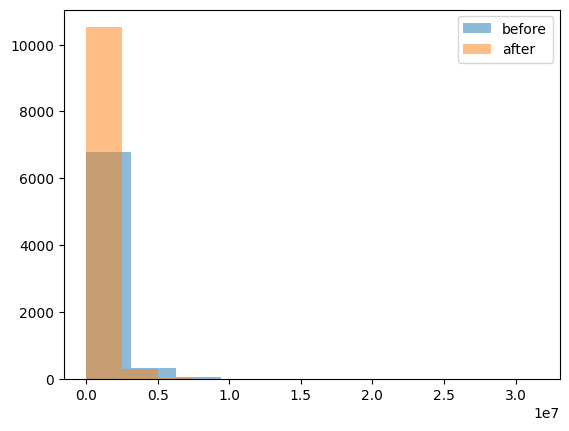

In [17]:
"""To plot our variables, we need kurtosis and skewness to be between -3 and 3 for a
t-test to work properly. We will plot them anyways then observe the kurtosis and skewness after."""


plt.hist(before['price'], alpha = .5, label = "before")
plt.hist(after['price'], alpha = .5, label = "after")
plt.legend(loc="upper right")
plt.show()

In [18]:
print(stats.describe(before['price']))
print(stats.describe(after['price']))

DescribeResult(nobs=7228, minmax=(0.0, 31500000.0), mean=1284797.9284726065, variance=2502892121503.391, skewness=7.457482722928772, kurtosis=90.61473097889234)
DescribeResult(nobs=10911, minmax=(0.0, 25000000.0), mean=888022.5260746037, variance=872311719739.7847, skewness=7.617954168347385, kurtosis=110.37892623491675)


In [19]:
"""Skewness and kurtosis are too high to move forward"""

'Skewness and kurtosis are too high to move forward'

In [20]:
"""Next, we will ask 'Is the sale price on average higher for homes with a pool?'"""

"Next, we will ask 'Is the sale price on average higher for homes with a pool?'"

In [21]:
pool_yes = df[df['pool'] == 'yes']
pool_yes.info()

pool_no = df[df['pool'] == 'no']
pool_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4055 entries, 22 to 35379
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4055 non-null   int64  
 1   id                  4055 non-null   object 
 2   stateId             4055 non-null   int64  
 3   countyId            4055 non-null   int64  
 4   cityId              4055 non-null   int64  
 5   country             4055 non-null   object 
 6   datePostedString    4054 non-null   object 
 7   is_bankOwned        4055 non-null   object 
 8   is_forAuction       4055 non-null   object 
 9   event               4055 non-null   object 
 10  time                4006 non-null   float64
 11  price               4055 non-null   float64
 12  pricePerSquareFoot  4055 non-null   float64
 13  city                4055 non-null   object 
 14  state               4055 non-null   object 
 15  yearBuilt           4055 non-null   int64  
 16  stre

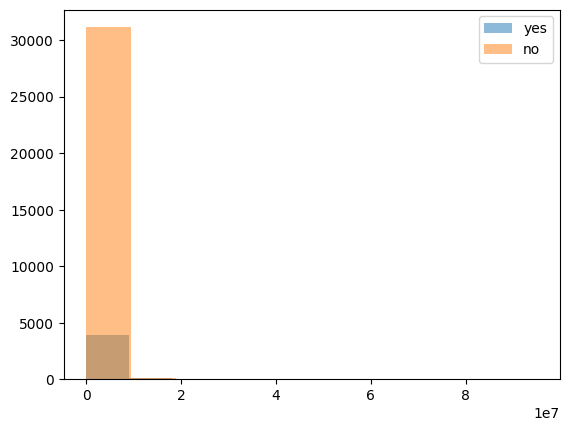

In [22]:
plt.hist(pool_yes['price'], alpha = .5, label = "yes")
plt.hist(pool_no['price'], alpha = .5, label = "no")
plt.legend(loc="upper right")
plt.show()

In [23]:
print(stats.describe(pool_yes['price']))
print(stats.describe(pool_no['price']))

DescribeResult(nobs=4055, minmax=(0.0, 90000000.0), mean=2256247.3196054255, variance=24061958522285.977, skewness=8.413774120708153, kurtosis=101.51449840727832)
DescribeResult(nobs=31334, minmax=(0.0, 95000000.0), mean=1049630.5733707794, variance=4149943197445.149, skewness=16.528380813307635, kurtosis=474.60138069165566)


In [24]:
"""Skewness and kurtosis are too high again"""

'Skewness and kurtosis are too high again'

In [25]:
"""Is the sale price on average higher for homes with a spa?"""

'Is the sale price on average higher for homes with a spa?'

In [26]:
spa_yes = df[df['spa'] == 'yes']
spa_yes.info()

spa_no = df[df['spa'] == 'no']
spa_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5890 entries, 3 to 35379
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5890 non-null   int64  
 1   id                  5890 non-null   object 
 2   stateId             5890 non-null   int64  
 3   countyId            5890 non-null   int64  
 4   cityId              5890 non-null   int64  
 5   country             5890 non-null   object 
 6   datePostedString    5890 non-null   object 
 7   is_bankOwned        5890 non-null   object 
 8   is_forAuction       5890 non-null   object 
 9   event               5890 non-null   object 
 10  time                5838 non-null   float64
 11  price               5890 non-null   float64
 12  pricePerSquareFoot  5890 non-null   float64
 13  city                5890 non-null   object 
 14  state               5890 non-null   object 
 15  yearBuilt           5890 non-null   int64  
 16  stree

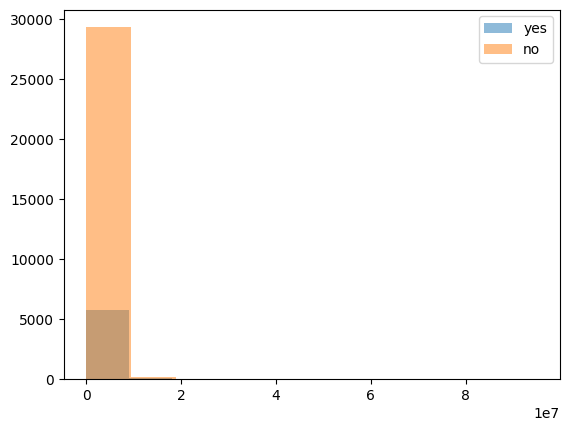

In [27]:
plt.hist(spa_yes['price'], alpha = .5, label = "yes")
plt.hist(spa_no['price'], alpha = .5, label = "no")
plt.legend(loc="upper right")
plt.show()

In [28]:
print(stats.describe(spa_yes['price']))
print(stats.describe(spa_no['price']))

DescribeResult(nobs=5890, minmax=(0.0, 90000000.0), mean=1792287.9723259762, variance=16805417157606.19, skewness=10.569004183882507, kurtosis=159.67003845142654)
DescribeResult(nobs=29499, minmax=(0.0, 95000000.0), mean=1067210.112546188, variance=4449668895268.242, skewness=15.337210941689268, kurtosis=406.8914594622712)


In [29]:
"""Skewness and kurtosis are too high again"""

'Skewness and kurtosis are too high again'

In [30]:
"""Next, we will ask 'Is the sale price on average higher for homes with a garage?'"""

"Next, we will ask 'Is the sale price on average higher for homes with a garage?'"

In [31]:
hasGarage_yes = df[df['hasGarage'] == 'yes']
hasGarage_yes.info()

hasGarage_no = df[df['hasGarage'] == 'no']
hasGarage_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17432 entries, 1 to 35385
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17432 non-null  int64  
 1   id                  17432 non-null  object 
 2   stateId             17432 non-null  int64  
 3   countyId            17432 non-null  int64  
 4   cityId              17432 non-null  int64  
 5   country             17432 non-null  object 
 6   datePostedString    17432 non-null  object 
 7   is_bankOwned        17432 non-null  object 
 8   is_forAuction       17432 non-null  object 
 9   event               17432 non-null  object 
 10  time                17184 non-null  float64
 11  price               17432 non-null  float64
 12  pricePerSquareFoot  17432 non-null  float64
 13  city                17432 non-null  object 
 14  state               17432 non-null  object 
 15  yearBuilt           17432 non-null  int64  
 16  stre

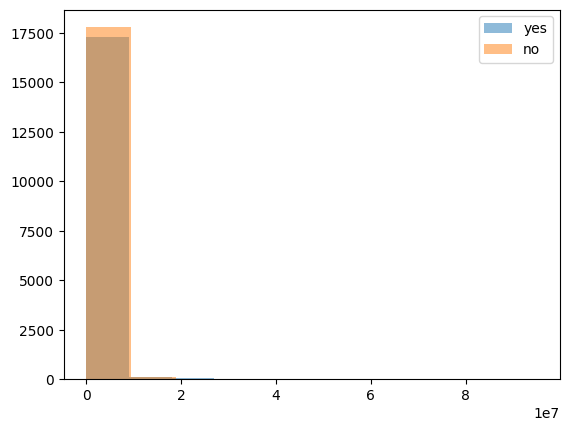

In [32]:
plt.hist(hasGarage_yes['price'], alpha = .5, label = "yes")
plt.hist(hasGarage_no['price'], alpha = .5, label = "no")
plt.legend(loc="upper right")
plt.show()

In [33]:
print(stats.describe(hasGarage_yes['price']))
print(stats.describe(hasGarage_no['price']))

DescribeResult(nobs=17432, minmax=(0.0, 90000000.0), mean=1288409.5465236348, variance=5305257127740.432, skewness=13.015016165913194, kurtosis=297.8977396427809)
DescribeResult(nobs=17957, minmax=(0.0, 95000000.0), mean=1090307.5152865178, variance=7795810896309.916, skewness=15.116848328073349, kurtosis=337.9065504075256)


In [34]:
"""Even though all of the assumptions for the t-test are not met, we will run the t-test"""

'Even though all of the assumptions for the t-test are not met, we will run the t-test'

In [35]:
stats.ttest_ind(hasGarage_yes['price'], hasGarage_no['price'])

TtestResult(statistic=7.269346300493105, pvalue=3.686937992562574e-13, df=35387.0)

In [36]:
"""The t-statistic is greater than 1.96 which satisfies rejecting the null
hypothesis, however the p-value is nowhere near being at or below 0.05 meaning the test isn't significant.
There is a high probability that you would find an effect at least as extreme as this sample's,
assuming that the null is true."""

"The t-statistic is greater than 1.96 which satisfies rejecting the null\nhypothesis, however the p-value is nowhere near being at or below 0.05 meaning the test isn't significant. \nThere is a high probability that you would find an effect at least as extreme as this sample's, \nassuming that the null is true."

In [37]:
"""Next, we will calculate the 95% confidence interval"""

'Next, we will calculate the 95% confidence interval'

In [38]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [39]:
get_95_ci(hasGarage_yes['price'], hasGarage_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -251364.93084068704 and -144839.131633547.'

In [40]:
"""Now we will create a point plot to compare the means"""

'Now we will create a point plot to compare the means'

[[Text(0, 0, 'hasGarage_yes'), Text(1, 0, 'hasGarage_no')]]

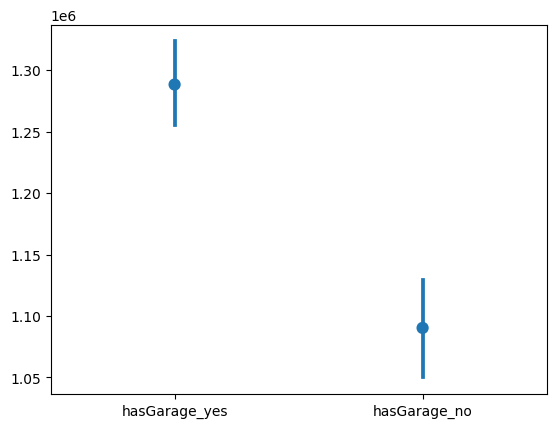

In [41]:
import seaborn as sns

g = sns.pointplot(data=[hasGarage_yes['price'], hasGarage_no['price']], join=False)

g.set(xticklabels = ['hasGarage_yes', 'hasGarage_no'])

In [42]:
"""Let's take a preliminary look at our data"""

"Let's take a preliminary look at our data"

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  object 
 8   is_forAuction       35389 non-null  object 
 9   event               35389 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

In [44]:
df.columns

Index(['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'datePostedString', 'is_bankOwned', 'is_forAuction', 'event', 'time',
       'price', 'pricePerSquareFoot', 'city', 'state', 'yearBuilt',
       'streetAddress', 'zipcode', 'longitude', 'latitude', 'hasBadGeocode',
       'description', 'currency', 'livingArea', 'livingAreaValue',
       'lotAreaUnits', 'bathrooms', 'bedrooms', 'buildingArea', 'parking',
       'garageSpaces', 'hasGarage', 'levels', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed', 'homeType', 'county'],
      dtype='object')

In [45]:
df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,no,no,Listed for sale,...,0,0.0,no,0,no,no,no,no,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,no,no,Listed for sale,...,1,2.0,yes,One Story,no,no,no,no,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,no,no,Listed for sale,...,1,2.0,yes,One Story,no,no,no,no,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,no,no,Listed for sale,...,1,1.0,yes,Two Story,no,yes,no,no,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,no,no,Listed for sale,...,0,0.0,no,0,no,no,no,no,LOT,Contra Costa County


In [46]:
"""It looks like there is a good mix of numerical and
catergorical variables in this dataset. There are 39 variables and
35389 entries in total."""

'It looks like there is a good mix of numerical and \ncatergorical variables in this dataset. There are 39 variables and \n35389 entries in total.'

In [47]:
"""Now that we've seen the data, let's explore it with some EDA"""

"Now that we've seen the data, let's explore it with some EDA"

In [48]:
df.nunique()

Unnamed: 0            35389
id                    31238
stateId                   1
countyId              34520
cityId                 1048
country                   1
datePostedString        556
is_bankOwned              2
is_forAuction             2
event                     7
time                   1308
price                  4276
pricePerSquareFoot     1964
city                   1236
state                     1
yearBuilt               161
streetAddress         31130
zipcode                1597
longitude             30370
latitude              30666
hasBadGeocode             2
description           30858
currency                  1
livingArea             4675
livingAreaValue        4676
lotAreaUnits              2
bathrooms                26
bedrooms                 30
buildingArea           2758
parking                   2
garageSpaces             29
hasGarage                 2
levels                   48
pool                      2
spa                       2
isNewConstruction   

In [49]:
"""df.unique() gives us all of the unique values for each column.

It looks like there are 10 variables that have binary
data which is represented by a 2

id, countyId, streetAddress, longitude, latitude and
description all have primarily unique values for each entry.

stateId, state, country and currency all only have one
unique value which makes sense because the dataset is of
california housing, using the same currency and located in
the same country

Let's do an initial search for missing values in our dataset"""

"df.unique() gives us all of the unique values for each column.\n\nIt looks like there are 10 variables that have binary\ndata which is represented by a 2 \n\nid, countyId, streetAddress, longitude, latitude and \ndescription all have primarily unique values for each entry.\n\nstateId, state, country and currency all only have one \nunique value which makes sense because the dataset is of \ncalifornia housing, using the same currency and located in \nthe same country\n\nLet's do an initial search for missing values in our dataset"

In [50]:
df.isnull()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
"""As we can see above, there are plenty of missing values. However, the above
is only a snippet of the bigger picture"""

'As we can see above, there are plenty of missing values. However, the above \nis only a snippet of the bigger picture'

In [52]:
"""To get a better idea of how many missing values there are
in our dataset let's get some percentages of missing values for
each variable"""

"To get a better idea of how many missing values there are \nin our dataset let's get some percentages of missing values for \neach variable"

In [53]:
"""Percentage of missing values per column"""

df.isnull().sum()*100/df.isnull().count()

Unnamed: 0            0.000000
id                    0.000000
stateId               0.000000
countyId              0.000000
cityId                0.000000
country               0.000000
datePostedString      0.008477
is_bankOwned          0.000000
is_forAuction         0.000000
event                 0.000000
time                  0.816638
price                 0.000000
pricePerSquareFoot    0.000000
city                  0.000000
state                 0.000000
yearBuilt             0.000000
streetAddress         0.000000
zipcode               0.070643
longitude             0.000000
latitude              0.000000
hasBadGeocode         0.000000
description           0.788381
currency              0.000000
livingArea            0.000000
livingAreaValue       0.000000
lotAreaUnits          0.000000
bathrooms             0.000000
bedrooms              0.000000
buildingArea          0.000000
parking               0.000000
garageSpaces          0.000000
hasGarage             0.000000
levels  

In [54]:
"""There appears to be a small amount of missing values in the datePostedString,
time, zipcode, and description columns. <1% each."""

'There appears to be a small amount of missing values in the datePostedString,\ntime, zipcode, and description columns. <1% each.'

In [55]:
"""Since we will not lose a significant amount of information from these records
by eliminating them, we will decide to do so. This way we can
continue to analyze our data as a whole without any gaps that might deter
our calculations."""

'Since we will not lose a significant amount of information from these records\nby eliminating them, we will decide to do so. This way we can\ncontinue to analyze our data as a whole without any gaps that might deter\nour calculations.'

In [56]:
"""When trying to plot the log of the continuous variables, I found that
there are zero values in the price column.
We will drop these as well as they functionally act the same as
null or missing values"""

'When trying to plot the log of the continuous variables, I found that\nthere are zero values in the price column.\nWe will drop these as well as they functionally act the same as\nnull or missing values'

In [57]:
"""Count of 0 values in price column"""
print((df.price.values == 0).sum())

319


In [58]:
"""Count of 0 values in pricePerSquareFoot column"""
print((df.pricePerSquareFoot.values == 0).sum())

7186


In [59]:
"""Count of 0 values in yearBuilt, livingArea, livingAreaValue, bathrooms, bedrooms, buildingArea, and garageSpaces columns"""
print((df.yearBuilt.values == 0).sum())
print((df.livingArea.values == 0).sum())
print((df.livingAreaValue.values == 0).sum())
print((df.bathrooms.values == 0).sum())
print((df.bedrooms.values == 0).sum())
print((df.buildingArea.values == 0).sum())
print((df.garageSpaces.values == 0).sum())

6015
6765
6764
8079
7546
29271
18908


In [60]:
"""Above, we calculated all of the zero values. Zero values may hinder out calculations later
in our analysis. Let's try to understand what the zero values mean and how to handle them.

 - 'price' column zero values represent a mistake in recording of the data
 - same for 'pricePerSquareFoot'
 - 'yearBuilt' column zero values could represent a mistake in recording of the data
 if there is a house on the real estate because it can't be built in year '0'. However, if there
 is not a house built on the land, then this zero value may make sense."""

"Above, we calculated all of the zero values. Zero value might hinder out calculations later\nin our analysis. Let's try to understand what the zero value mean and how to handle them.\n\n - 'price' column zero values represent a mistake in recording of the data\n - same for 'pricePerSquareFoot'\n - 'yearBuilt' column zero values could represent a mistake in recording of the data \n if there is a house on the real estate because it can't be built in year '0'. However, if there\n is not house built on the land, then this zero value may make sense."

In [61]:
df.loc[df['price'] == 0, 'price'] = np.nan
df.loc[df['pricePerSquareFoot'] == 0, 'price'] = np.nan
df.loc[df['yearBuilt'] == 0, 'price'] = np.nan

In [62]:
"""Now let's replace all of the zero values with null values and drop them so they don't
stop our natural log from running in the future."""

"Now let's replace all of the zero values with null values and drop them so they don't\nstop our natural log from running in the future."

In [63]:
df.dropna(inplace = True)

In [64]:
"""Count of 0 values in price column"""
print((df.price.values == 0).sum())

0


In [65]:
"""Count of 0 values in pricePerSquareFoot column"""
print((df.pricePerSquareFoot.values == 0).sum())

0


In [67]:
"""Count of 0 values in yearBuilt column"""
print((df.yearBuilt.values == 0).sum())

0


In [70]:
"""Now let's test for outliers. Outliers may hinder the reliability of our predictions just as
null values could. We want to handle them in order to increase our accuracy of anaysis."""

"Now let's test for outliers. Outliers may hinder the reliability of our predictions just as\nnull values could. We want to handle them in order to increase our accuracy of anaysis."

In [71]:
"""We will start with statistical tests"""

'We will start with statistical tests'

In [72]:
from scipy.stats import zscore

z_scores = zscore(df["price"])
for threshold in range(1,5):
   print("The score threshold is: {}".format(threshold))
   print("The indices of the outliers:")
   print(np.where(z_scores > threshold))
   print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   18,    36,    43, ..., 27660, 27664, 27668]),)
Number of outliers is: 1285
The score threshold is: 2
The indices of the outliers:
(array([   36,    50,    97,   101,   105,   106,   107,   109,   110,
         111,   112,   113,   114,   115,   116,   249,   261,   263,
         264,   282,   371,   461,   538,   697,   883,   913,   916,
         939,   943,   944,   950,   957,   992,   997,   998,  1331,
        1351,  1357,  1734,  1887,  2075,  2079,  2101,  2103,  2143,
        2314,  2806,  2808,  2816,  2865,  2866,  2881,  2882,  3036,
        3272,  3276,  3282,  3283,  3288,  3289,  3291,  3350,  3368,
        3466,  3468,  3705,  3709,  3710,  3720,  3721,  3814,  3815,
        3818,  3983,  3988,  4052,  4065,  4097,  4107,  4145,  4146,
        4420,  4424,  4435,  4440,  4667,  4713,  4732,  4948,  5017,
        5029,  5201,  5202,  5203,  5205,  5207,  5208,  5209,  5210,
        5212,  5213,  5227,  5230

In [73]:
"""From the test above it seems that we have no outliers, which is odd, but good."""

'From the test above it seems that we have no outliers, which is odd, but good.'

In [74]:
"""Now let's visually inspect our data for outliers to confirm the statistical test."""

"Now let's visually inspect our data for outliers to confirm the statistical test."

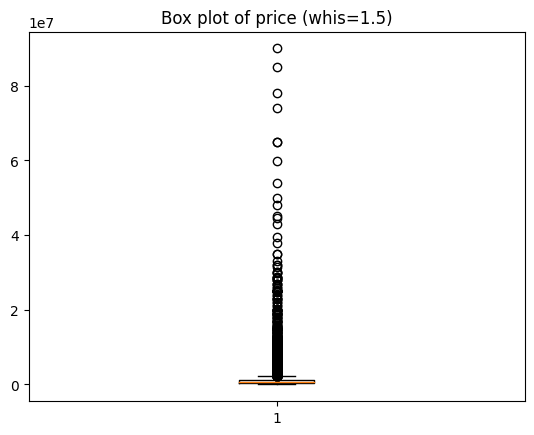

In [75]:
import matplotlib.pyplot as plt

plt.boxplot(df["price"])
plt.title("Box plot of price (whis=1.5)")
plt.show()

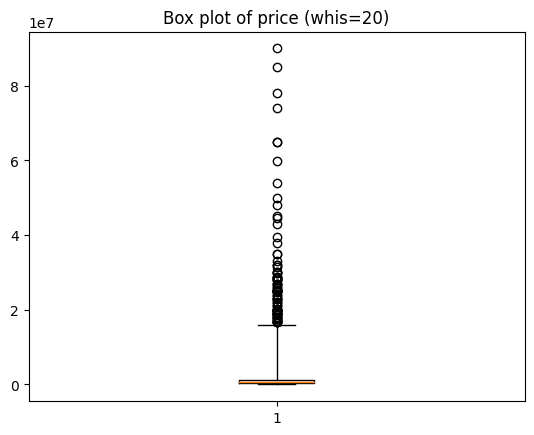

In [76]:
plt.boxplot(df["price"], whis=20)
plt.title("Box plot of price (whis=20)")
plt.show()

In [77]:
"""The boxplot shows there are only outliers on the high end"""

'The boxplot shows there are only outliers on the high end'

In [78]:
"""Let's confirm with a histogram"""

"Let's confirm with a histogram"

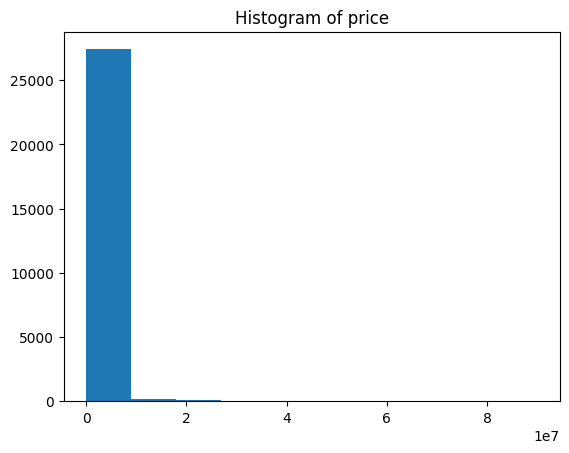

In [79]:
plt.hist(df["price"])
plt.title("Histogram of price")
plt.show()

In [80]:
"""The histogram confirms that the outliers are only on the high end."""

'The histogram confirms that the outliers are only on the high end.'

In [81]:
"""We will use one way winsorization, that should solve the outliers."""

'We will use one way winsorization, that should solve the outliers.'

In [82]:
from scipy.stats.mstats import winsorize

df["win_price"] = winsorize(df["price"], (0, 0.10))

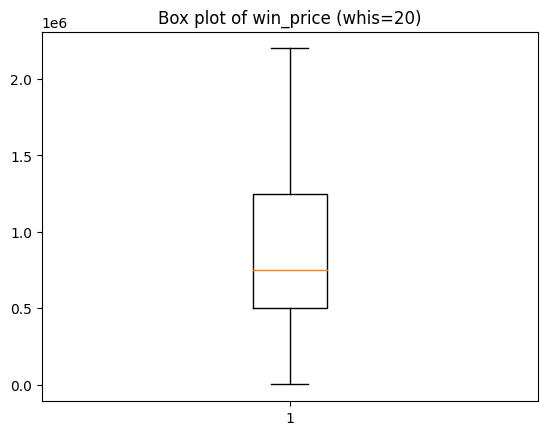

In [83]:
plt.boxplot(df["win_price"], whis=20)
plt.title("Box plot of win_price (whis=20)")
plt.show()

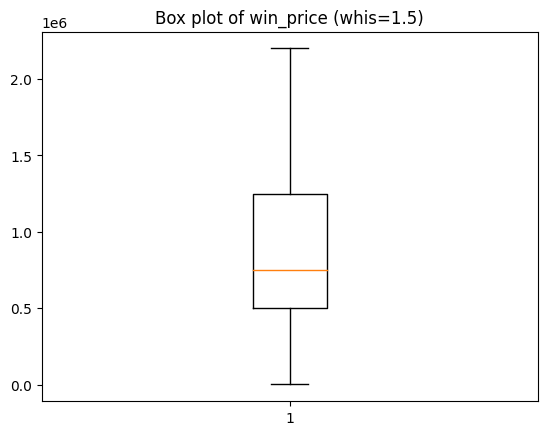

In [84]:
plt.boxplot(df["win_price"])
plt.title("Box plot of win_price (whis=1.5)")
plt.show()

In [85]:
df["win_pricePerSquareFoot"] = winsorize(df["pricePerSquareFoot"], (0, 0.10))
df["win_time"] = winsorize(df["time"], (0, 0.10))
df["win_yearBuilt"] = winsorize(df["yearBuilt"], (0, 0.10))
df["win_livingArea"] = winsorize(df["livingArea"], (0, 0.10))
df["win_livingAreaValue"] = winsorize(df["livingAreaValue"], (0, 0.10))
df["win_bathrooms"] = winsorize(df["bathrooms"], (0, 0.10))
df["win_bedrooms"] = winsorize(df["bedrooms"], (0, 0.10))
df["win_buildingArea"] = winsorize(df["buildingArea"], (0, 0.10))
df["win_garageSpaces"] = winsorize(df["garageSpaces"], (0, 0.10))

In [86]:
"""We have transformed the outliers successfully."""

'We have transformed the outliers successfully.'

In [87]:
"""Now for some EDA. We can leave out ID, countyID, cityID, zipcode, Longitude and Latitude.
I will leave them out of my EDA and only use them to engineer
new features or earn something about other features."""

'Now for some EDA. We can leave out ID, countyID, cityID, zipcode, Longitude and Latitude.\nI will leave them out of my EDA and only use them to engineer\nnew features or earn something about other features.'

In [88]:
"""For organization sake, let's make a list of our continuous
and categorical variables that we plan to explore with our EDA."""

"For organization sake, let's make a list of our continuous\nand categorical variables that we plan to explore with our EDA."

In [89]:
continuous = ["price","pricePerSquareFoot","time","yearBuilt","livingArea","livingAreaValue","bathrooms",
        "bedrooms","buildingArea","garageSpaces", "win_price",
        "win_pricePerSquareFoot", "win_time",
        "win_yearBuilt", "win_livingArea", "win_livingAreaValue",
        "win_bathrooms", "win_bedrooms", "win_buildingArea", "win_garageSpaces"]

In [90]:
categorical = ["is_bankOwned", "is_forAuction", "event", "hasBadGeocode",
               "lotAreaUnits", "hasGarage", "pool", "spa",
               "isNewConstruction", "hasPetsAllowed", "homeType"]

In [91]:
import scipy.stats as stats

df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
count,27674.000000,27674.0,27674.000000,27674.000000,2.767400e+04,2.767400e+04,2.767400e+04,27674.000000,27674.000000,27674.000000,...,2.767400e+04,27674.000000,2.767400e+04,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000
mean,17705.559298,9.0,129325.638867,34412.617330,1.613584e+12,1.222223e+06,1.042031e+03,1972.759558,93208.694623,-119.583028,...,9.383290e+05,494.709583,1.613579e+12,1971.681289,1923.873636,1924.000650,2.351485,3.148154,310.159572,1.153357
std,10306.202562,0.0,94436.351165,53765.523164,7.556338e+10,2.274553e+06,2.471156e+04,55.947622,1788.651305,2.035888,...,5.948716e+05,240.740272,7.556252e+10,27.174929,832.519818,832.494424,1.049873,1.160464,637.217708,1.103490
min,1.000000,9.0,151.000000,0.000000,8.717760e+10,1.600000e+03,1.000000e+00,1850.000000,90001.000000,-124.343575,...,1.600000e+03,1.000000,8.717760e+10,1850.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8646.250000,9.0,50437.500000,13072.000000,1.624406e+12,4.990000e+05,3.020000e+02,1954.000000,91910.000000,-121.728958,...,4.990000e+05,302.000000,1.624406e+12,1954.000000,1272.000000,1272.000000,2.000000,3.000000,0.000000,0.000000
50%,17684.500000,9.0,107752.500000,25934.000000,1.625530e+12,7.500000e+05,4.510000e+02,1975.000000,93034.000000,-118.738365,...,7.500000e+05,451.000000,1.625530e+12,1975.000000,1743.000000,1743.000000,2.000000,3.000000,0.000000,1.000000
75%,26807.750000,9.0,206013.750000,45457.000000,1.625789e+12,1.249000e+06,6.570000e+02,1994.000000,94941.000000,-117.900341,...,1.249000e+06,657.000000,1.625789e+12,1994.000000,2458.750000,2459.000000,3.000000,4.000000,0.000000,2.000000
max,35388.000000,9.0,333077.000000,781837.000000,1.626221e+12,9.000000e+07,2.100000e+06,9999.000000,96161.000000,-114.364960,...,2.199000e+06,942.000000,1.626048e+12,2007.000000,3515.000000,3515.000000,4.000000,5.000000,1808.000000,3.000000


In [92]:
df.describe(include=['O'])

,id,country,datePostedString,is_bankOwned,is_forAuction,event,city,state,streetAddress,hasBadGeocode,...,currency,lotAreaUnits,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
count,27674,27674,27674,27674,27674,27674,27674,27674,27674,27674,...,27674,27674,27674,27674,27674,27674,27674,27674,27674,27674
unique,23910,1,335,2,2,6,1080,1,23897,1,...,1,2,2,47,2,2,2,2,6,58
top,93065-16453267,USA,2021-07-09,no,no,Listed for sale,Los Angeles,CA,Residence 1 Plan,no,...,USD,sqft,yes,0,no,no,no,no,SINGLE_FAMILY,Los Angeles County
freq,2,27674,3238,27671,27658,20542,1247,27674,7,27674,...,27674,19211,16353,10272,23744,21950,27266,27099,21468,6367


In [93]:
df.describe(include= 'all')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
count,27674.000000,27674,27674.0,27674.000000,27674.000000,27674,27674,27674,27674,27674,...,2.767400e+04,27674.000000,2.767400e+04,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000
unique,NaN,23910,NaN,NaN,NaN,1,335,2,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,93065-16453267,NaN,NaN,NaN,USA,2021-07-09,no,no,Listed for sale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,27674,3238,27671,27658,20542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17705.559298,NaN,9.0,129325.638867,34412.617330,NaN,NaN,NaN,NaN,NaN,...,9.383290e+05,494.709583,1.613579e+12,1971.681289,1923.873636,1924.000650,2.351485,3.148154,310.159572,1.153357
std,10306.202562,NaN,0.0,94436.351165,53765.523164,NaN,NaN,NaN,NaN,NaN,...,5.948716e+05,240.740272,7.556252e+10,27.174929,832.519818,832.494424,1.049873,1.160464,637.217708,1.103490
min,1.000000,NaN,9.0,151.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.600000e+03,1.000000,8.717760e+10,1850.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8646.250000,NaN,9.0,50437.500000,13072.000000,NaN,NaN,NaN,NaN,NaN,...,4.990000e+05,302.000000,1.624406e+12,1954.000000,1272.000000,1272.000000,2.000000,3.000000,0.000000,0.000000
50%,17684.500000,NaN,9.0,107752.500000,25934.000000,NaN,NaN,NaN,NaN,NaN,...,7.500000e+05,451.000000,1.625530e+12,1975.000000,1743.000000,1743.000000,2.000000,3.000000,0.000000,1.000000
75%,26807.750000,NaN,9.0,206013.750000,45457.000000,NaN,NaN,NaN,NaN,NaN,...,1.249000e+06,657.000000,1.625789e+12,1994.000000,2458.750000,2459.000000,3.000000,4.000000,0.000000,2.000000


In [94]:
"""Next, we will perform univariate visualization of the continuous variables."""

'Next, we will perform univariate visualization of the continuous variables.'

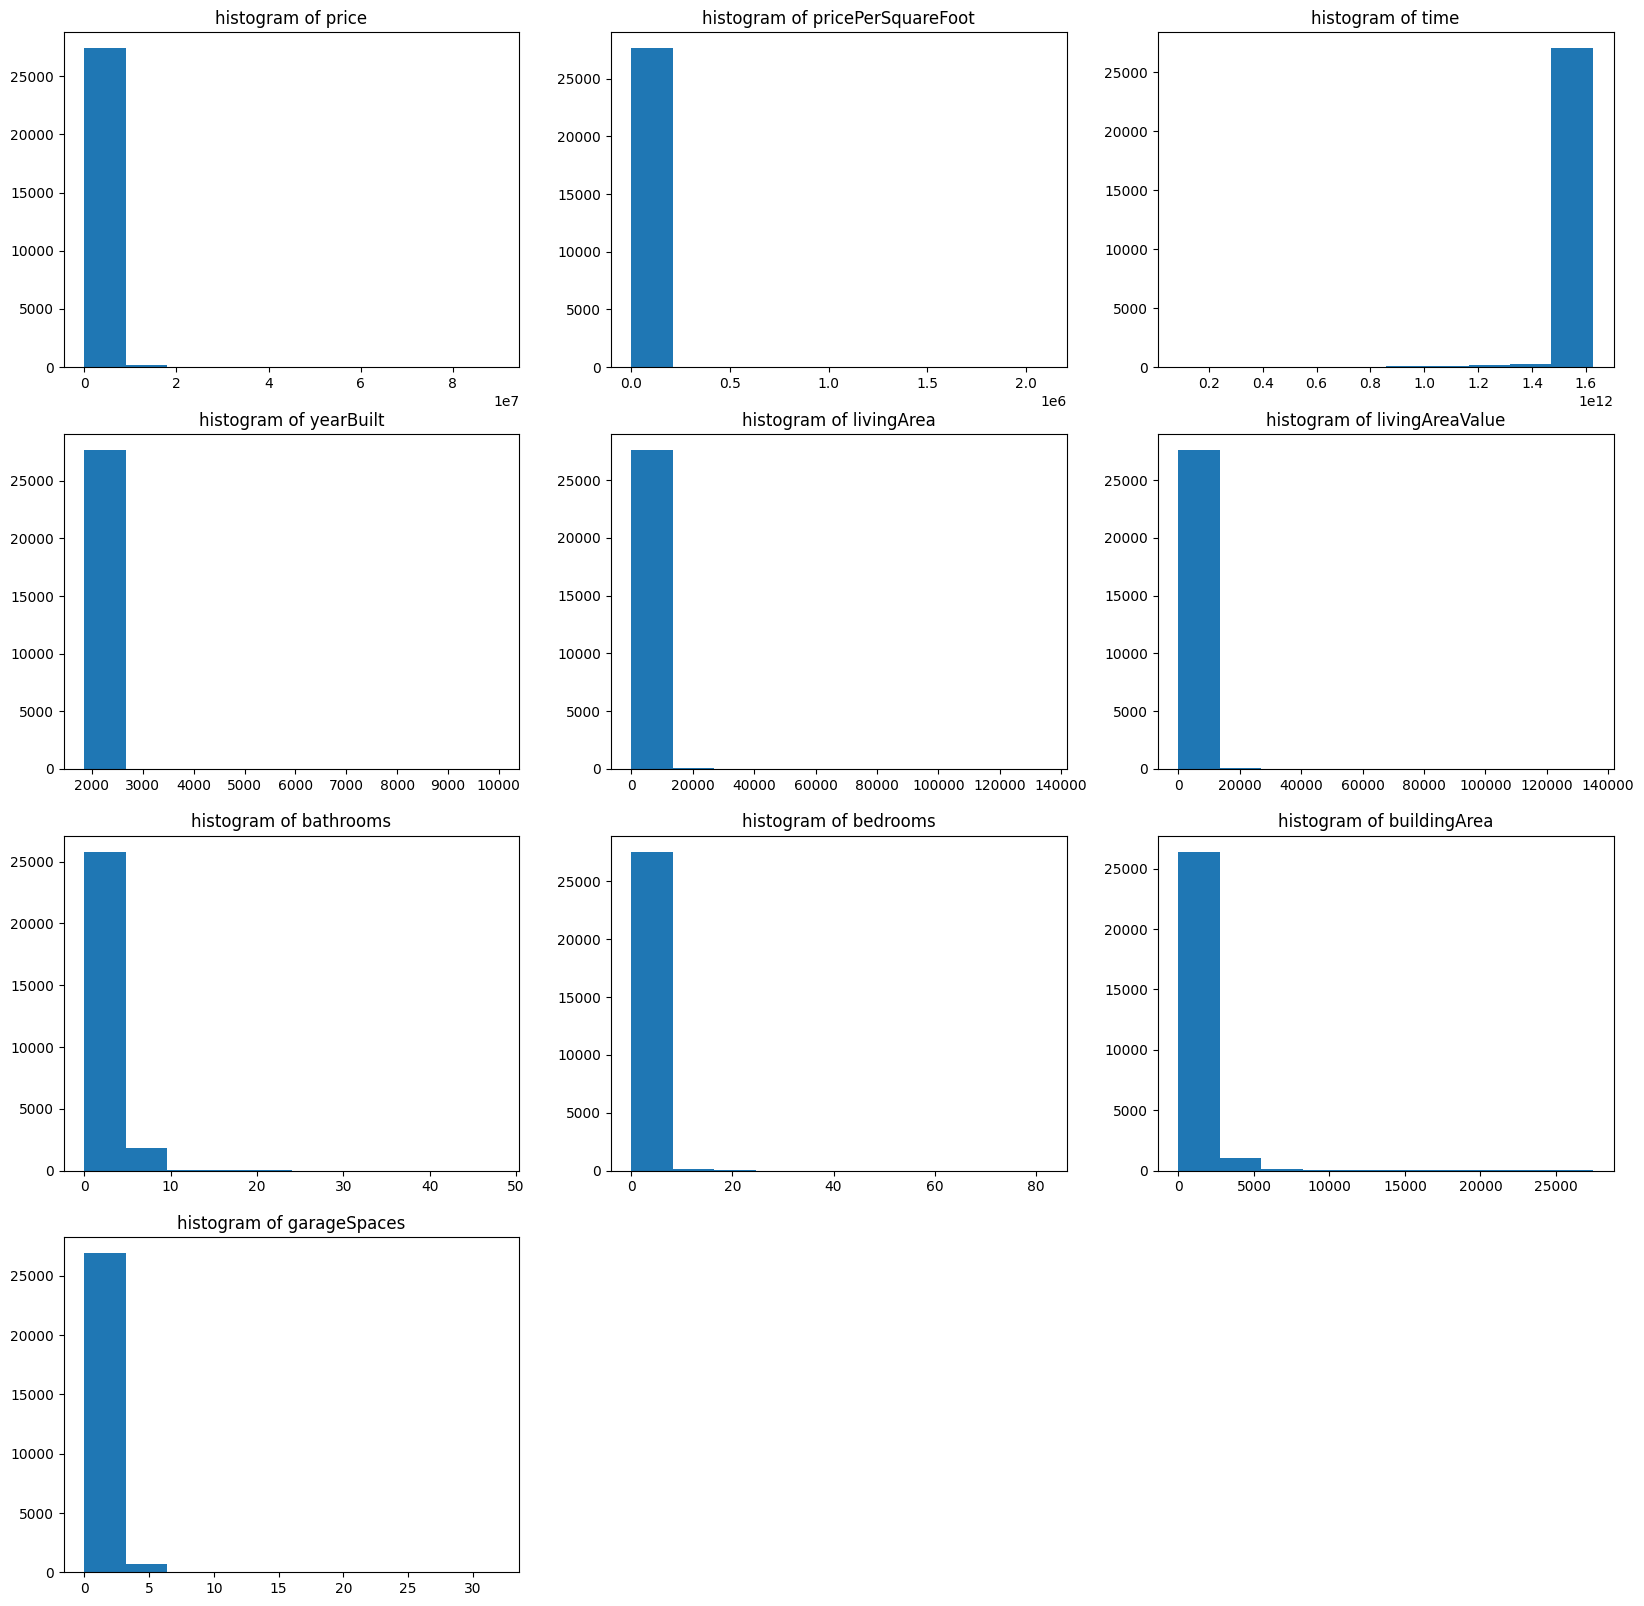

In [98]:
"""Now we will plot histograms of the original data"""

plt.figure(figsize=(20,20))

plt.subplot(4, 3, 1)
plt.hist(df["price"])
plt.title("histogram of price")

plt.subplot(4, 3, 2)
plt.hist(df["pricePerSquareFoot"])
plt.title("histogram of pricePerSquareFoot")

plt.subplot(4, 3, 3)
plt.hist(df["time"])
plt.title("histogram of time")

plt.subplot(4, 3, 4)
plt.hist(df["yearBuilt"])
plt.title("histogram of yearBuilt")

plt.subplot(4, 3, 5)
plt.hist(df["livingArea"])
plt.title("histogram of livingArea")

plt.subplot(4, 3, 6)
plt.hist(df["livingAreaValue"])
plt.title("histogram of livingAreaValue")

plt.subplot(4, 3, 7)
plt.hist(df["bathrooms"])
plt.title("histogram of bathrooms")

plt.subplot(4, 3, 8)
plt.hist(df["bedrooms"])
plt.title("histogram of bedrooms")

plt.subplot(4, 3, 9)
plt.hist(df["buildingArea"])
plt.title("histogram of buildingArea")

plt.subplot(4, 3, 10)
plt.hist(df["garageSpaces"])
plt.title("histogram of garageSpaces")

plt.show()

In [96]:
"""The original data is not very helpful."""

'The above is not very helpful.'

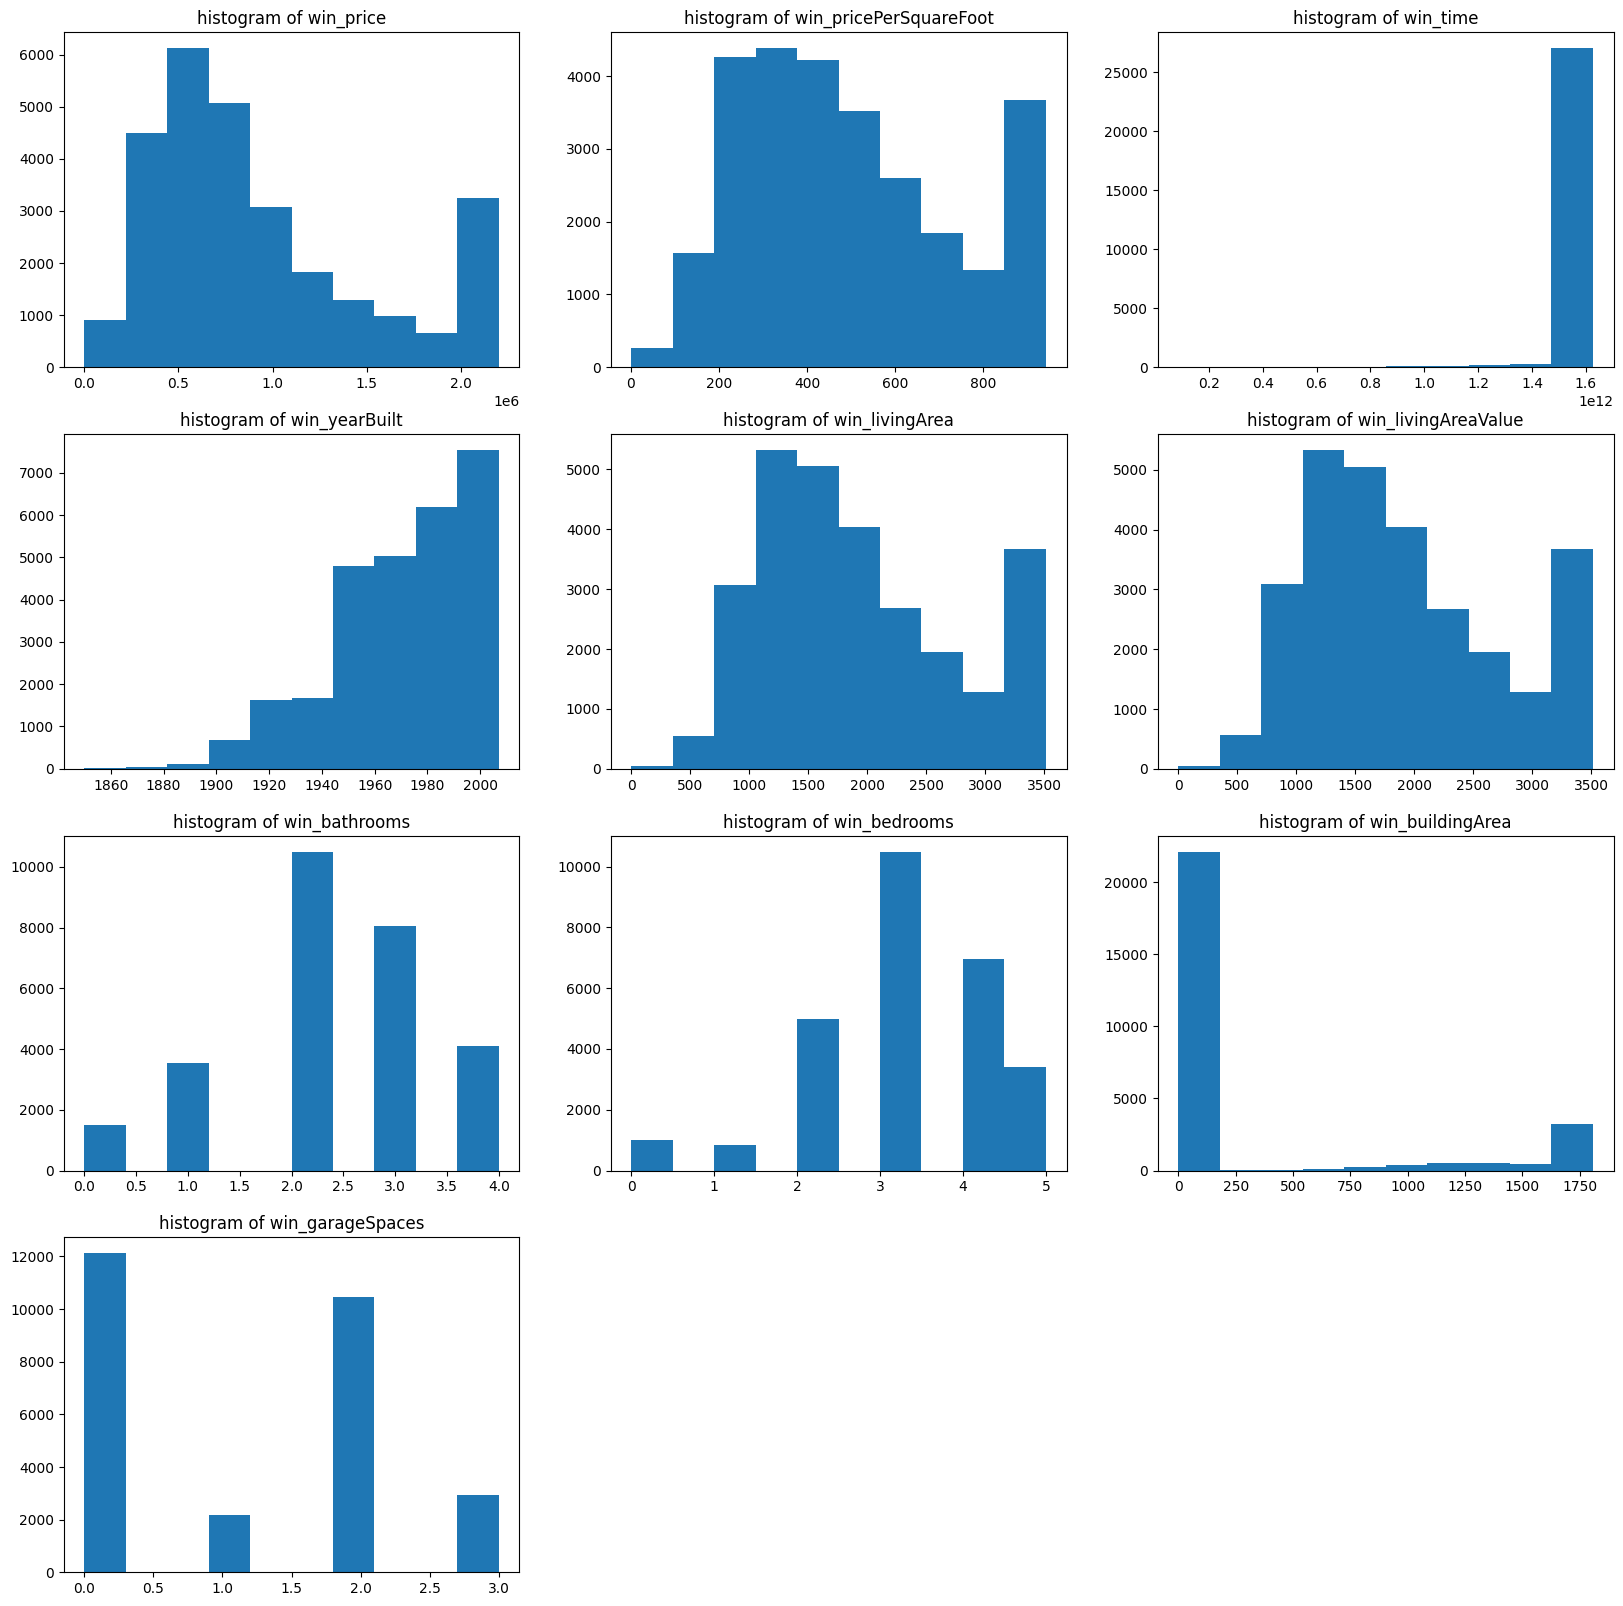

In [99]:
"""Now we will plot histograms of the winsorized data"""

plt.figure(figsize=(20,20))

plt.subplot(4, 3, 1)
plt.hist(df["win_price"])
plt.title("histogram of win_price")

plt.subplot(4, 3, 2)
plt.hist(df["win_pricePerSquareFoot"])
plt.title("histogram of win_pricePerSquareFoot")

plt.subplot(4, 3, 3)
plt.hist(df["win_time"])
plt.title("histogram of win_time")

plt.subplot(4, 3, 4)
plt.hist(df["win_yearBuilt"])
plt.title("histogram of win_yearBuilt")

plt.subplot(4, 3, 5)
plt.hist(df["win_livingArea"])
plt.title("histogram of win_livingArea")

plt.subplot(4, 3, 6)
plt.hist(df["win_livingAreaValue"])
plt.title("histogram of win_livingAreaValue")

plt.subplot(4, 3, 7)
plt.hist(df["win_bathrooms"])
plt.title("histogram of win_bathrooms")

plt.subplot(4, 3, 8)
plt.hist(df["win_bedrooms"])
plt.title("histogram of win_bedrooms")

plt.subplot(4, 3, 9)
plt.hist(df["win_buildingArea"])
plt.title("histogram of win_buildingArea")

plt.subplot(4, 3, 10)
plt.hist(df["win_garageSpaces"])
plt.title("histogram of win_garageSpaces")

plt.show()

In [100]:
"""Next we will visualize the categorical variables"""

'Next we will visualize the categorical variables'

In [101]:
"""Categorical variables for bar chart:
is_bankOwned, is_forAuction, event, hasBadGeocode, lotAreaUnits, hasGarage, pool, spa,
isNewConstruction, hasPetsAllowed, homeType

Categorical variables for word cloud:
city, county, levels"""

'Categorical variables for bar chart:\nis_bankOwned, is_forAuction, event, hasBadGeocode, lotAreaUnits, hasGarage, pool, spa,\nisNewConstruction, hasPetsAllowed, homeType\n\nCategorical variables for word cloud:\ncity, county, levels'

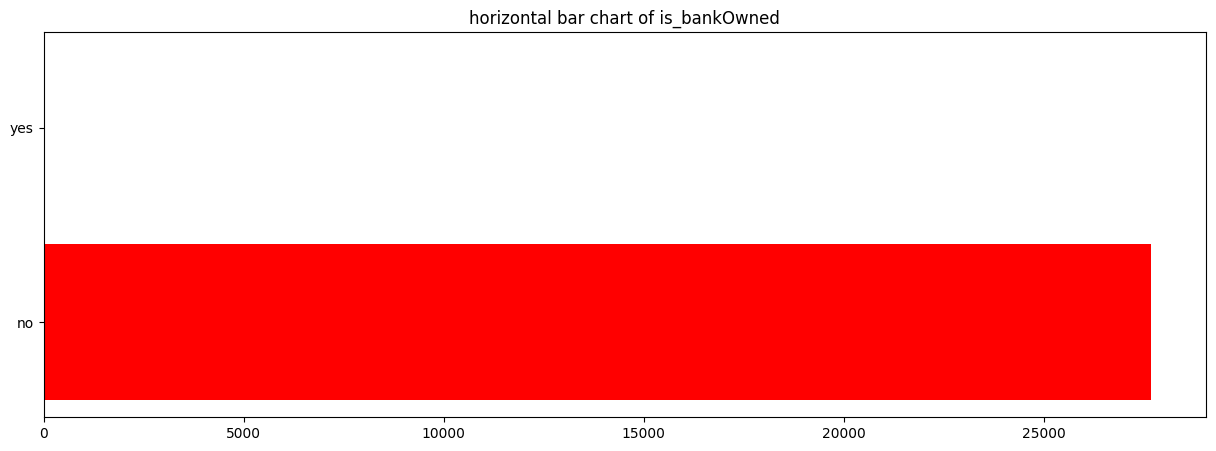

In [102]:
plt.figure(figsize=(15,5))

plt.barh(df.groupby("is_bankOwned")["is_bankOwned"].count().index,
       df.groupby("is_bankOwned")["is_bankOwned"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of is_bankOwned")

plt.show()

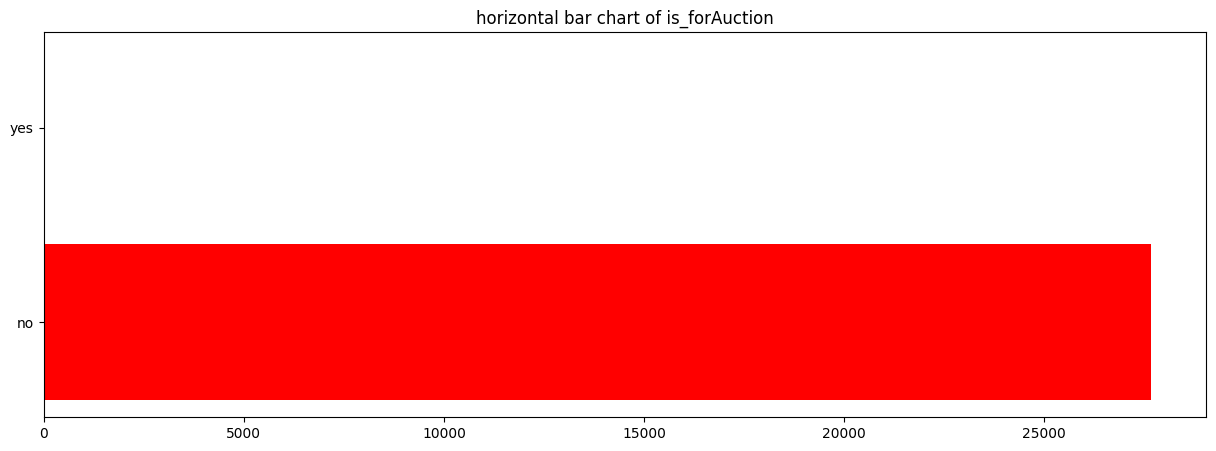

In [103]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("is_forAuction")["is_forAuction"].count().index,
       df.groupby("is_forAuction")["is_forAuction"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of is_forAuction")

plt.show()

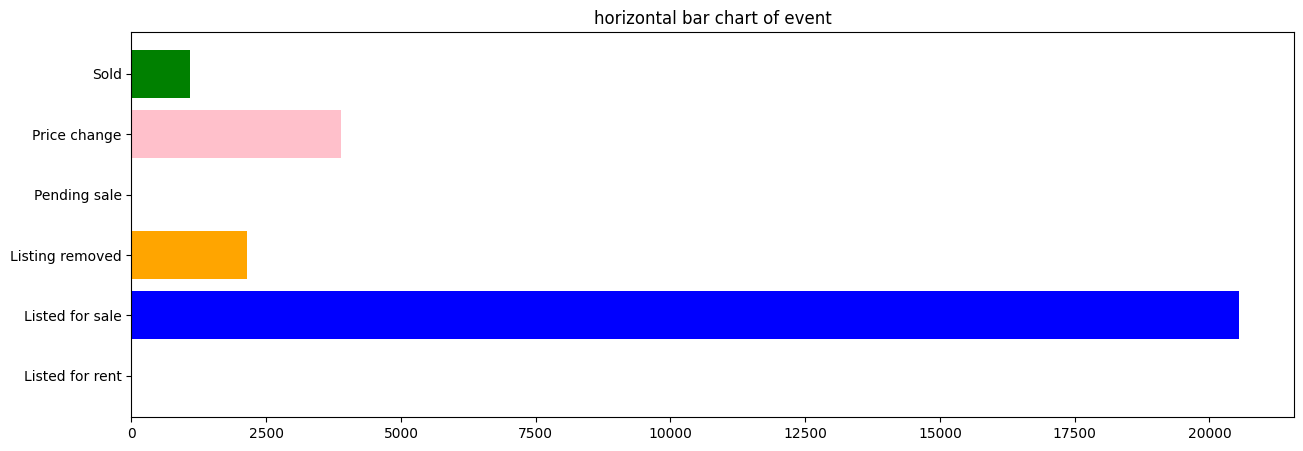

In [104]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("event")["event"].count().index,
       df.groupby("event")["event"].count(),
       color=["red","blue", "orange", "grey", "pink", "green"])
plt.title("horizontal bar chart of event")

plt.show()

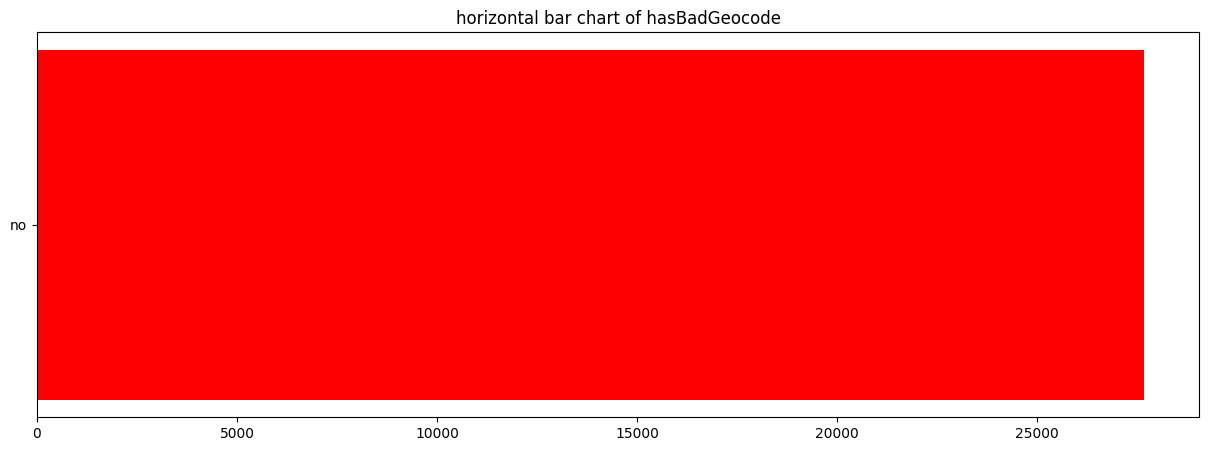

In [105]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("hasBadGeocode")["hasBadGeocode"].count().index,
       df.groupby("hasBadGeocode")["hasBadGeocode"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of hasBadGeocode")

plt.show()

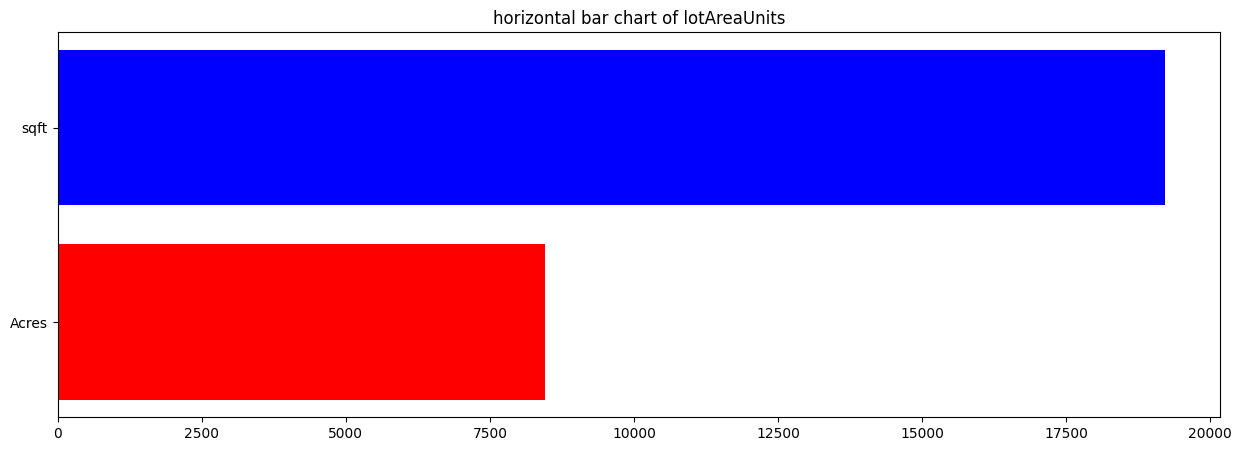

In [106]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("lotAreaUnits")["lotAreaUnits"].count().index,
       df.groupby("lotAreaUnits")["lotAreaUnits"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of lotAreaUnits")

plt.show()

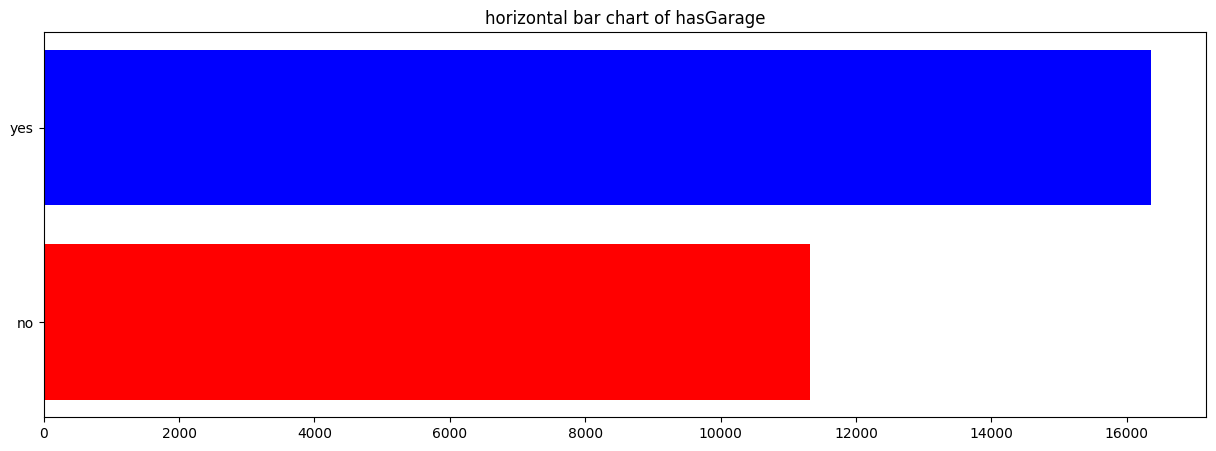

In [107]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("hasGarage")["hasGarage"].count().index,
       df.groupby("hasGarage")["hasGarage"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of hasGarage")

plt.show()

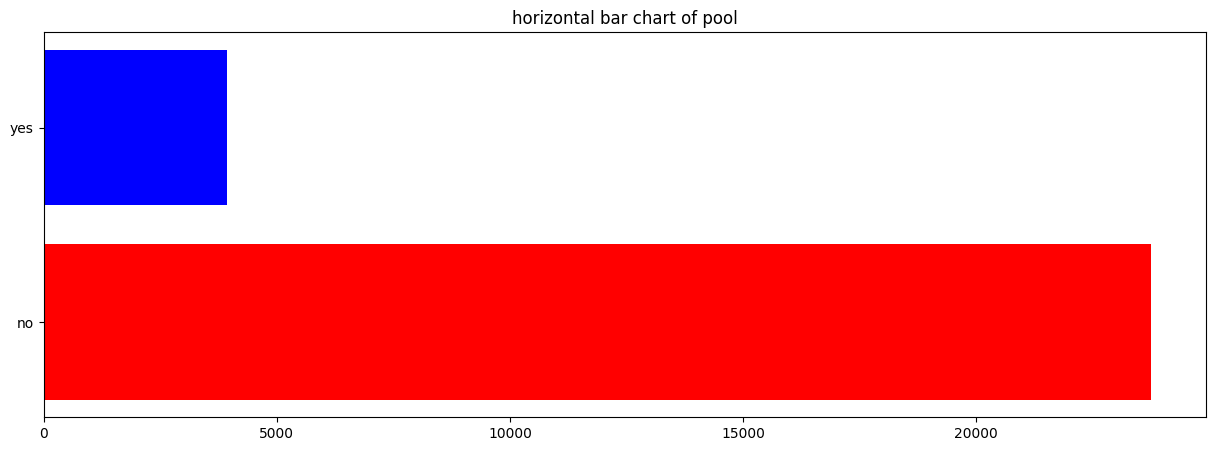

In [108]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("pool")["pool"].count().index,
       df.groupby("pool")["pool"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of pool")

plt.show()

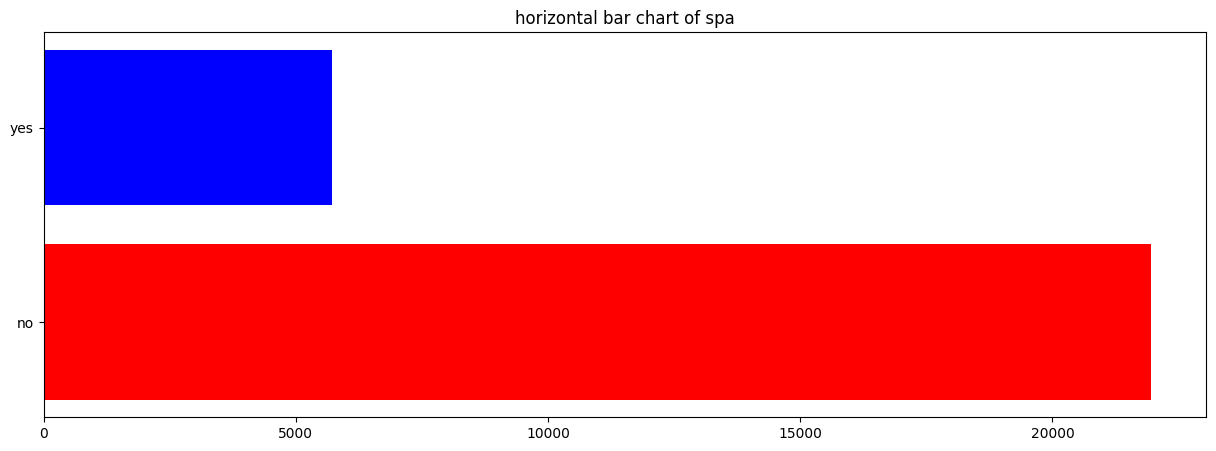

In [109]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("spa")["spa"].count().index,
       df.groupby("spa")["spa"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of spa")

plt.show()

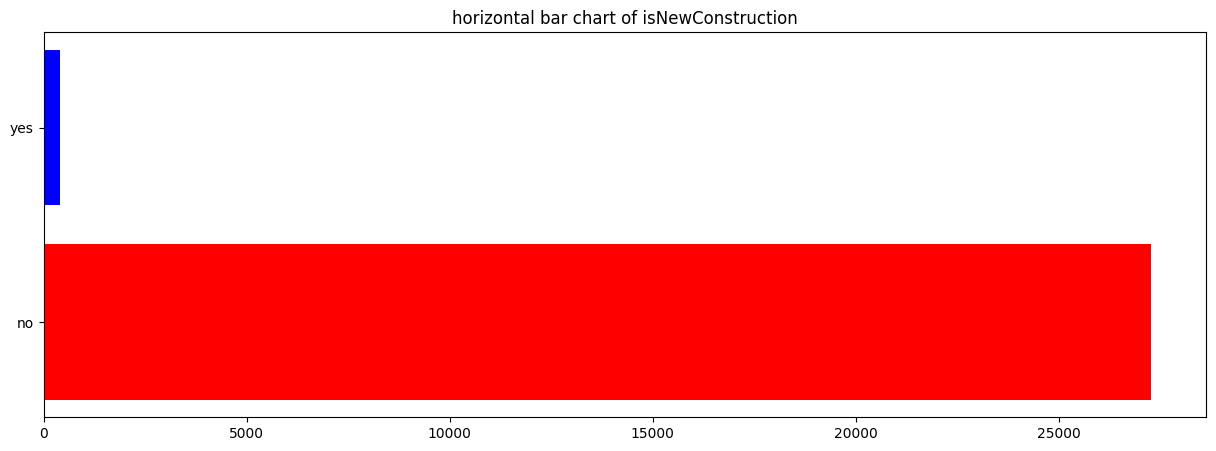

In [110]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("isNewConstruction")["isNewConstruction"].count().index,
       df.groupby("isNewConstruction")["isNewConstruction"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of isNewConstruction")

plt.show()

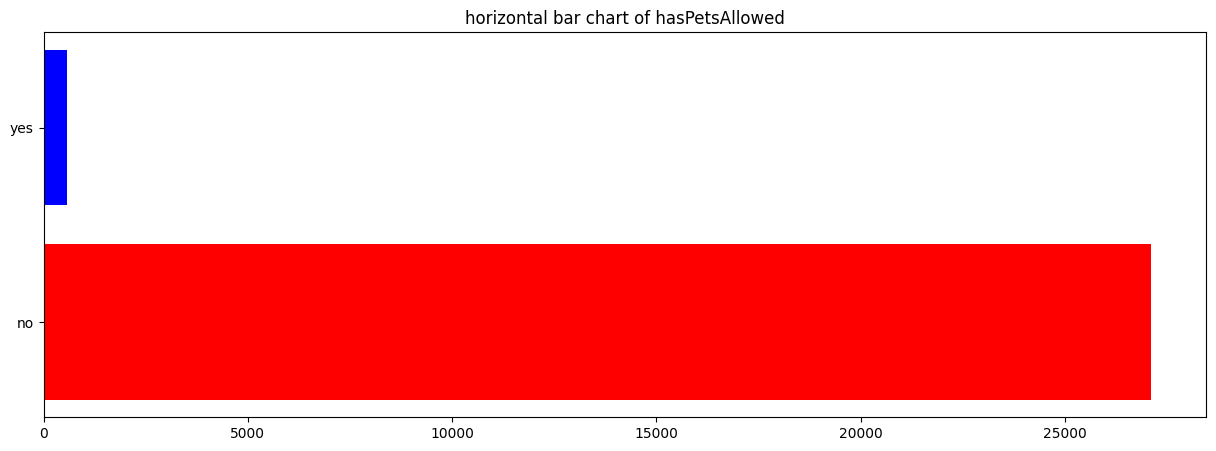

In [111]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("hasPetsAllowed")["hasPetsAllowed"].count().index,
       df.groupby("hasPetsAllowed")["hasPetsAllowed"].count(),
       color=["red","blue"])
plt.title("horizontal bar chart of hasPetsAllowed")

plt.show()

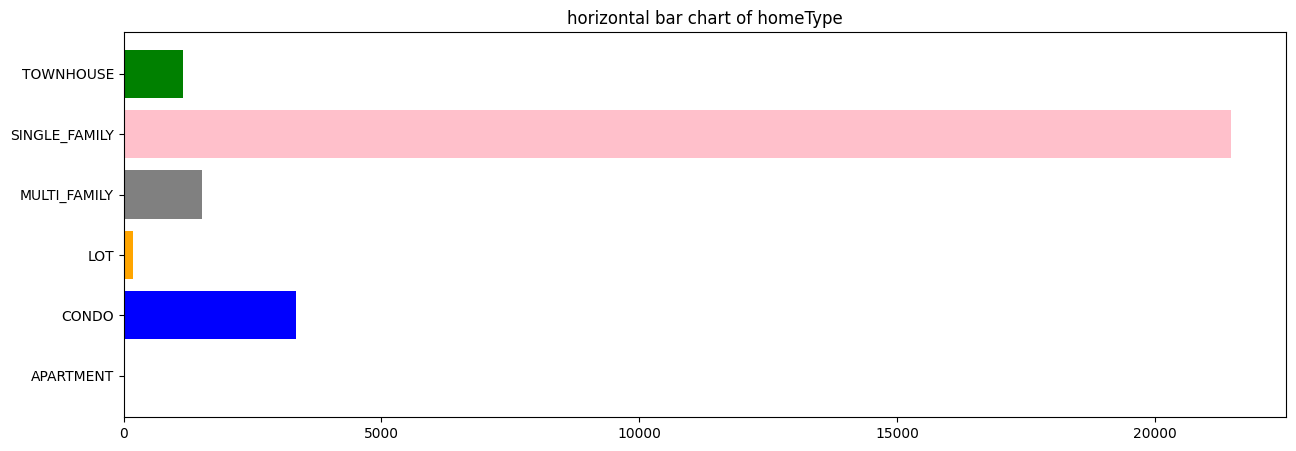

In [112]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby("homeType")["homeType"].count().index,
       df.groupby("homeType")["homeType"].count(),
       color=["red","blue", "orange", "grey", "pink", "green"])
plt.title("horizontal bar chart of homeType")

plt.show()

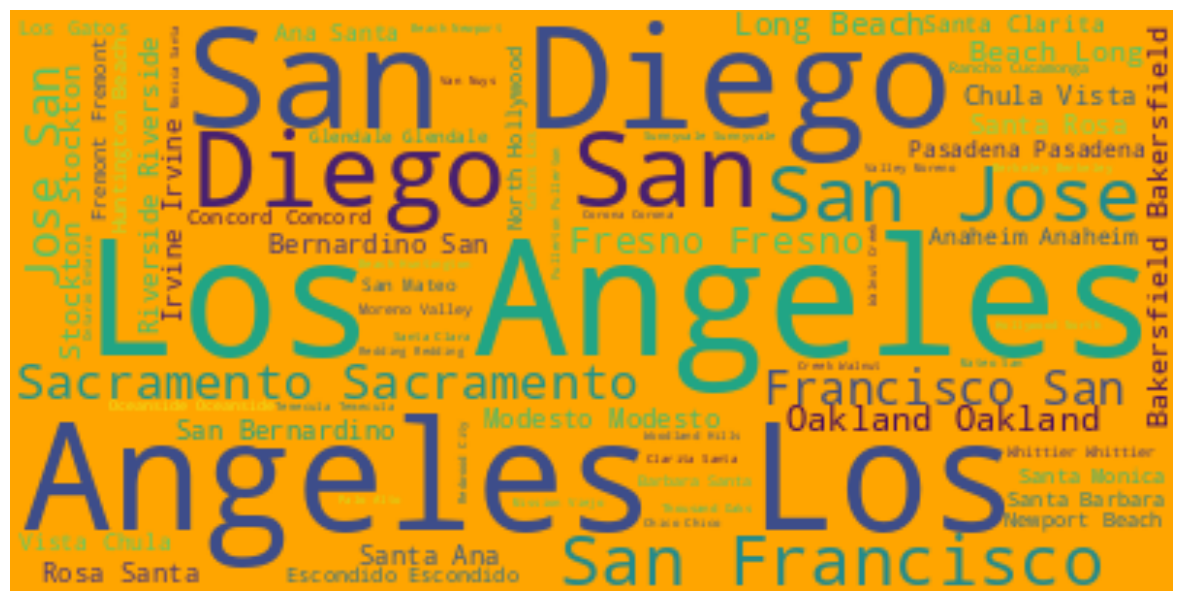

In [114]:
%pip install wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color="orange").generate(" ".join(df["city"]))
plt.figure(figsize=(15,10))
"""Display the generated image"""
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

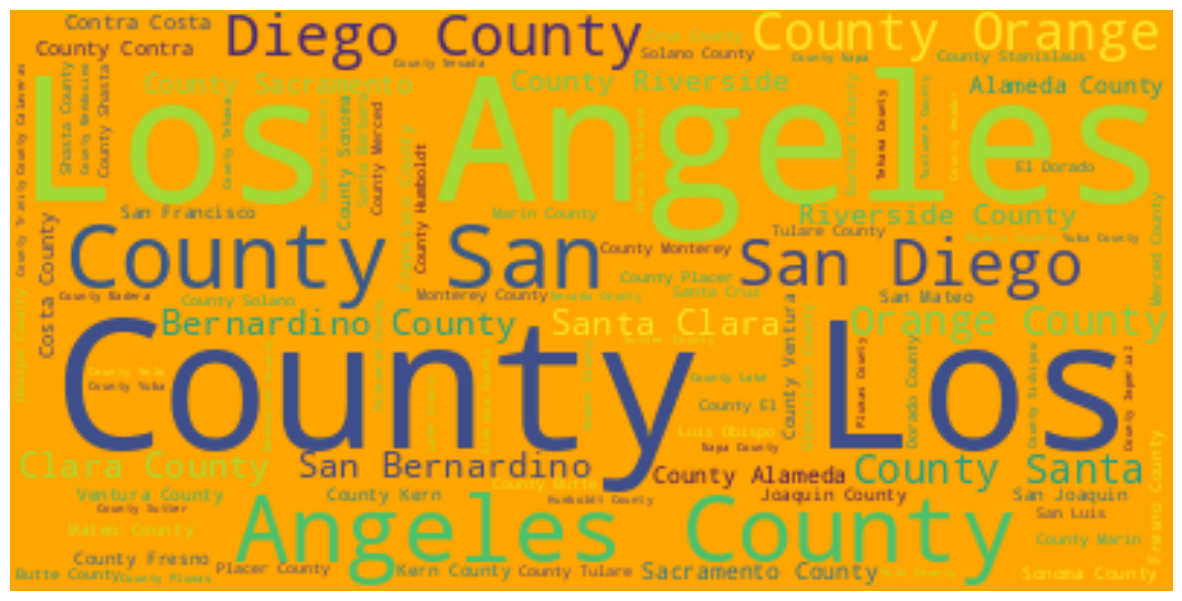

In [115]:
wordcloud = WordCloud(background_color="orange").generate(" ".join(df["county"]))
plt.figure(figsize=(15,10))
"""Display the generated image"""
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

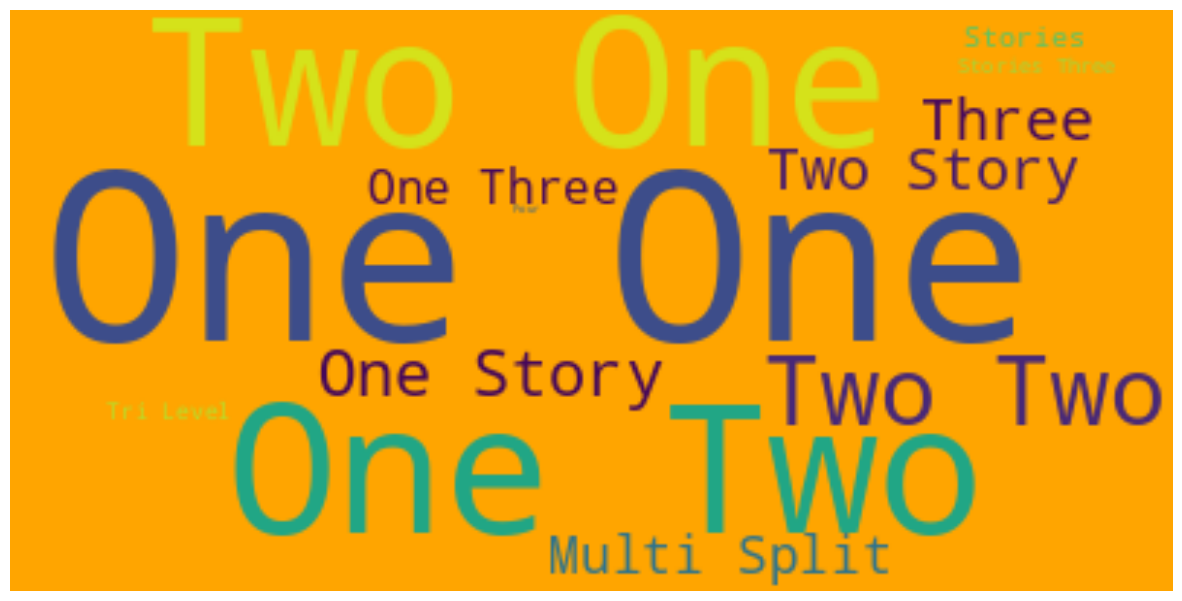

In [116]:
wordcloud = WordCloud(background_color="orange").generate(" ".join(df["levels"]))
plt.figure(figsize=(15,10))
"""Display the generated image"""
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [117]:
"""Now let's do some bivariate analysis to seem if there are any relatonships between variables"""

"Now let's do some bivariate analysis to seem if there are any relatonships between variables"

In [120]:
"""We will start with continuous-continuous variable relationships.

The continuous variables we are exploring are:
"price","pricePerSquareFoot","countyId","cityId","time","yearBuilt",
        "zipcode","livingArea","livingAreaValue","bathrooms",
        "bedrooms","buildingArea","garageSpaces" """

'We will start with continuous-continuous variable relationships.\n\nThe continuous variables we are exploring are:\n"price","pricePerSquareFoot","countyId","cityId","time","yearBuilt",\n        "zipcode","livingArea","livingAreaValue","bathrooms",\n        "bedrooms","buildingArea","garageSpaces" '

In [121]:
"""We want to examine the relationship to price first, as that's our target variable."""

"We want to examine the relationship to price first, as that's our target variable."

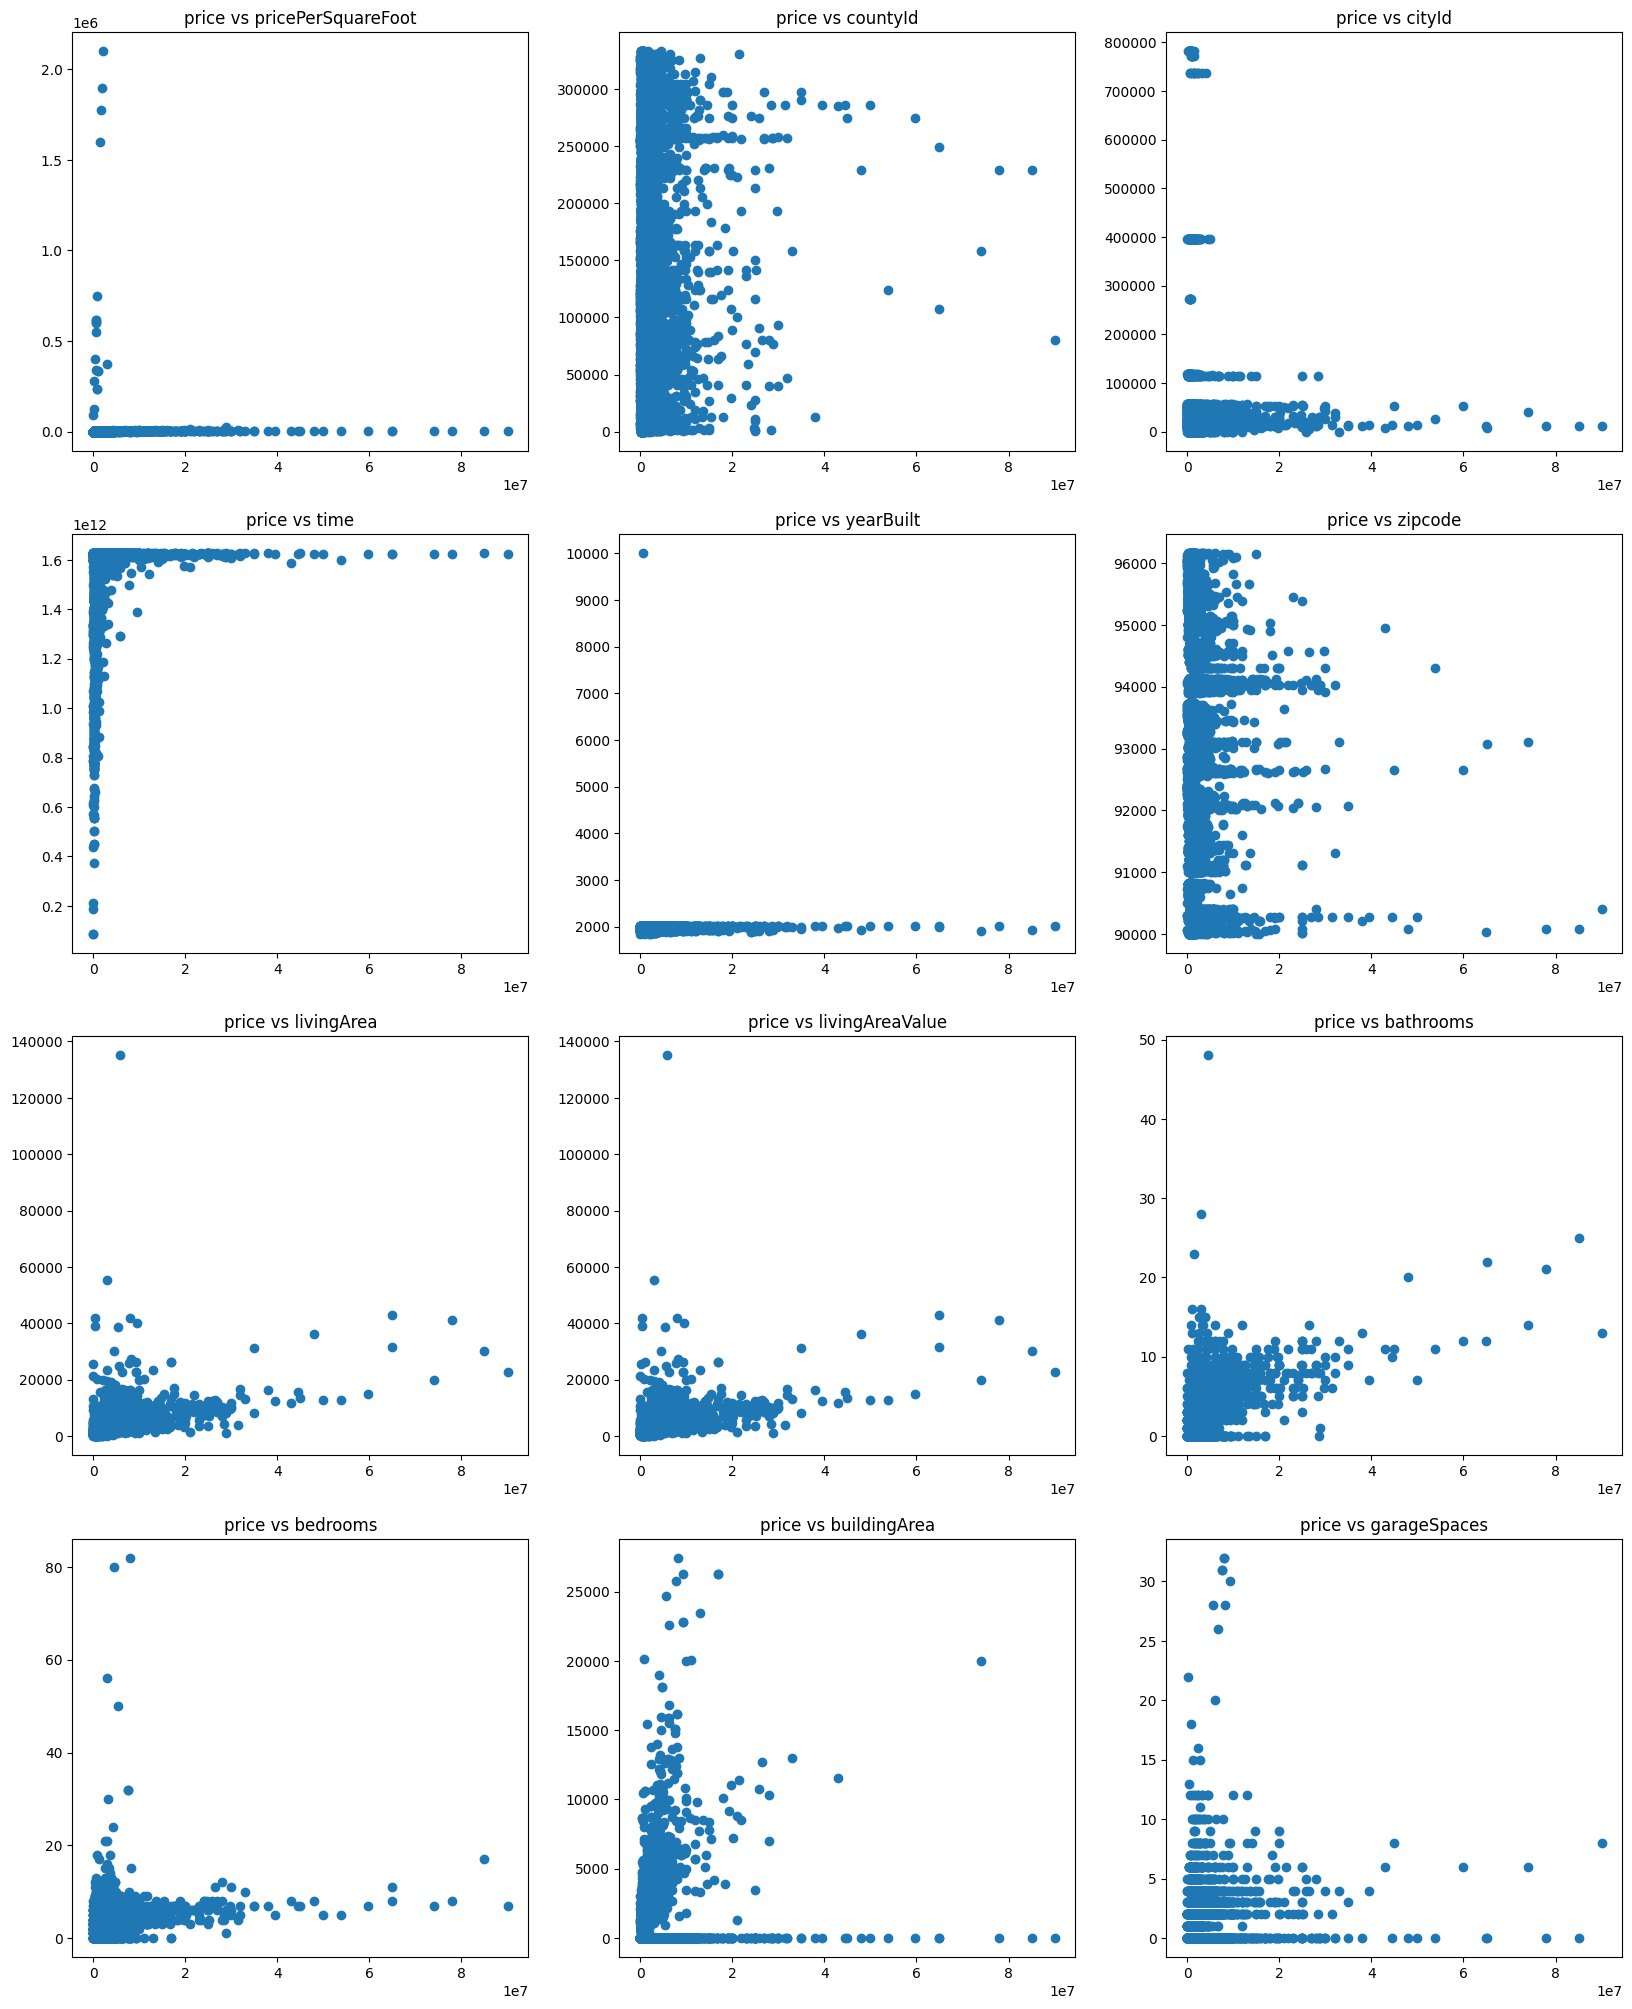

In [122]:
plt.figure(figsize=(20,25))

plt.subplot(4,3,1)
plt.scatter(df["price"], df["pricePerSquareFoot"])
plt.title("price vs pricePerSquareFoot")

plt.subplot(4,3,2)
plt.scatter(df["price"], df["countyId"])
plt.title("price vs countyId")

plt.subplot(4,3,3)
plt.scatter(df["price"], df["cityId"])
plt.title("price vs cityId")

plt.subplot(4,3,4)
plt.scatter(df["price"], df["time"])
plt.title("price vs time")

plt.subplot(4,3,5)
plt.scatter(df["price"], df["yearBuilt"])
plt.title("price vs yearBuilt")

plt.subplot(4,3,6)
plt.scatter(df["price"], df["zipcode"])
plt.title("price vs zipcode")

plt.subplot(4,3,7)
plt.scatter(df["price"], df["livingArea"])
plt.title("price vs livingArea")

plt.subplot(4,3,8)
plt.scatter(df["price"], df["livingAreaValue"])
plt.title("price vs livingAreaValue")

plt.subplot(4,3,9)
plt.scatter(df["price"], df["bathrooms"])
plt.title("price vs bathrooms")

plt.subplot(4,3,10)
plt.scatter(df["price"], df["bedrooms"])
plt.title("price vs bedrooms")

plt.subplot(4,3,11)
plt.scatter(df["price"], df["buildingArea"])
plt.title("price vs buildingArea")

plt.subplot(4,3,12)
plt.scatter(df["price"], df["garageSpaces"])
plt.title("price vs garageSpaces")

plt.show()

In [123]:
"""There seems to be a positive relationship between price and bathrooms"""

'There seems to be a positive relationship between price and bathrooms'

In [124]:
"""Let's examine the correlation coefficient to determine a if there is any
statistical significance"""

df[continuous].corr()

,price,pricePerSquareFoot,time,yearBuilt,livingArea,livingAreaValue,bathrooms,bedrooms,buildingArea,garageSpaces,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
price,1.000000,0.011638,0.046267,0.023959,0.559683,0.558072,0.487891,0.246672,0.205306,0.122116,0.526051,0.386850,0.046273,0.039800,0.374550,0.374557,0.262558,0.208334,0.063327,0.065780
pricePerSquareFoot,0.011638,1.000000,0.004421,0.122195,-0.021289,-0.021249,-0.025384,-0.034202,-0.006415,0.018179,0.023894,0.050895,0.004423,-0.007351,-0.046321,-0.046328,-0.035111,-0.046413,-0.009031,0.002723
time,0.046267,0.004421,1.000000,-0.003606,0.001922,0.001854,-0.011391,-0.011513,0.037236,-0.072817,0.127594,0.174555,1.000000,-0.010534,-0.006805,-0.006824,-0.018723,-0.017764,0.054125,-0.090286
yearBuilt,0.023959,0.122195,-0.003606,1.000000,0.058575,0.058773,0.155781,0.064568,-0.043640,0.092856,0.006778,-0.072977,-0.003606,0.510770,0.110376,0.110492,0.188916,0.101020,-0.057156,0.108427
livingArea,0.559683,-0.021289,0.001922,0.058575,1.000000,0.996592,0.507415,0.401728,0.380070,0.238803,0.470263,0.016353,0.001929,0.122321,0.648415,0.648264,0.313835,0.288308,0.106806,0.145216
livingAreaValue,0.558072,-0.021249,0.001854,0.058773,0.996592,1.000000,0.506137,0.400817,0.378809,0.238404,0.469100,0.015378,0.001860,0.122616,0.645420,0.647362,0.313246,0.287849,0.106260,0.145182
bathrooms,0.487891,-0.025384,-0.011391,0.155781,0.507415,0.506137,1.000000,0.624348,0.023464,0.231747,0.481056,0.123513,-0.011386,0.303522,0.591889,0.591959,0.866072,0.619251,-0.048254,0.249893
bedrooms,0.246672,-0.034202,-0.011513,0.064568,0.401728,0.400817,0.624348,1.000000,-0.046667,0.129028,0.289177,-0.039721,-0.011509,0.127034,0.475160,0.475247,0.540478,0.806834,-0.071923,0.159628
buildingArea,0.205306,-0.006415,0.037236,-0.043640,0.380070,0.378809,0.023464,-0.046667,1.000000,0.234845,0.249412,0.048373,0.037240,-0.085216,0.266970,0.266924,-0.050698,-0.104182,0.769098,0.108562
garageSpaces,0.122116,0.018179,-0.072817,0.092856,0.238803,0.238404,0.231747,0.129028,0.234845,1.000000,0.179450,-0.020988,-0.072821,0.195474,0.280321,0.280416,0.229585,0.171899,0.134913,0.881754


In [125]:
"""To visualize the correlation coefficient, let's make a heatmap."""

"To visualize the correlation coefficient, let's make a heatmap."

In [126]:
"""Make the correlation matrices"""
corrmat = df.corr()

<ipython-input-126-430f5e979919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


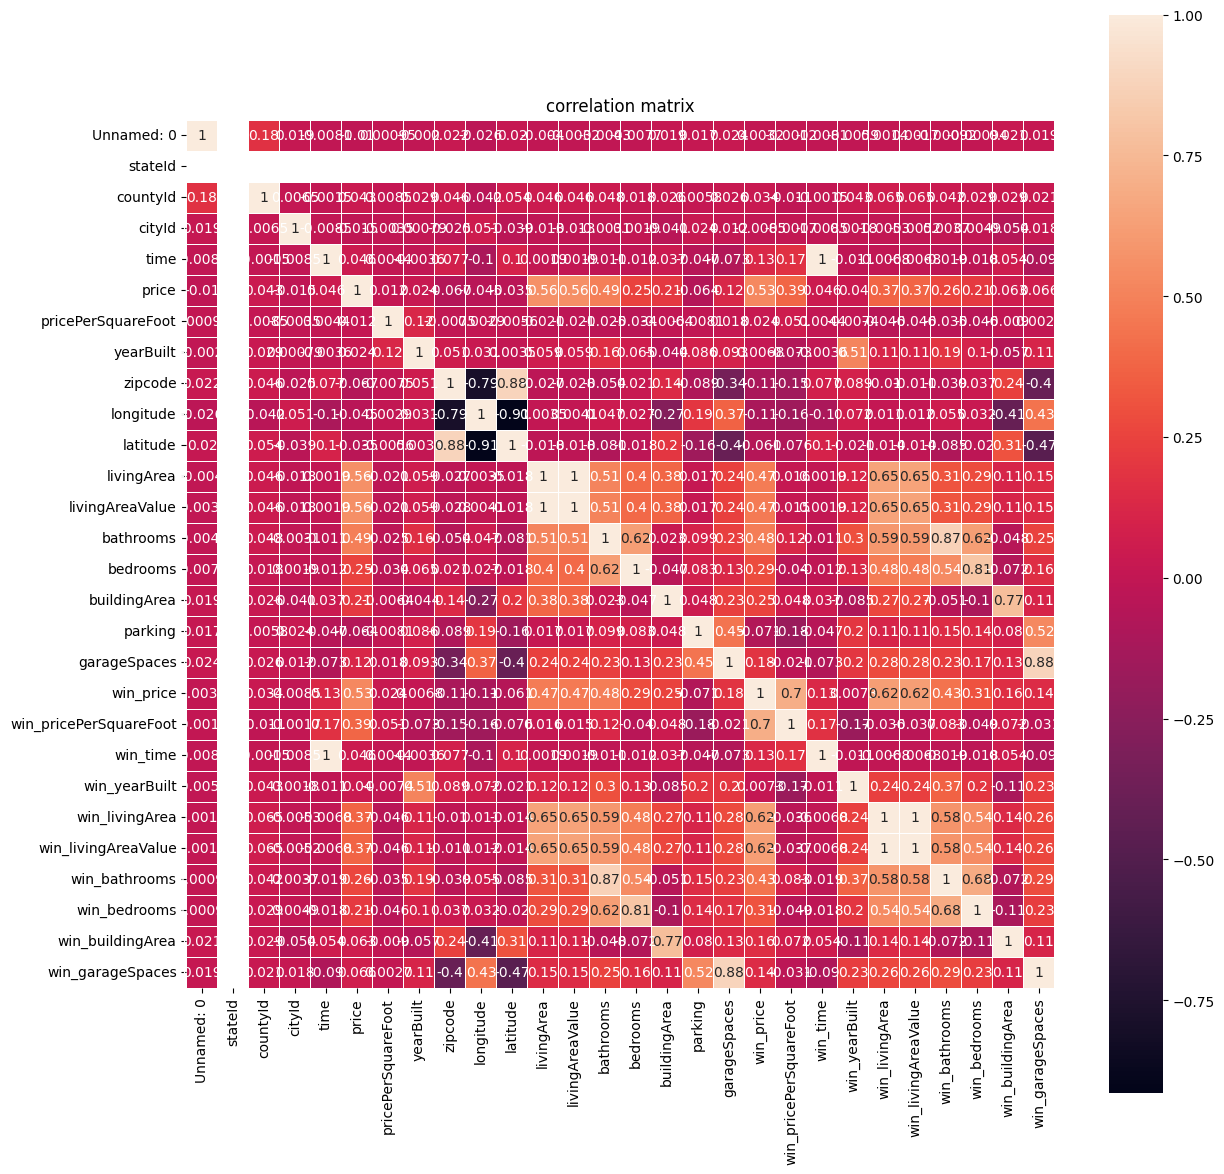

In [127]:
"""Draw the heat map using seaborn"""
plt.figure(figsize=(14,14))
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

plt.show()

In [128]:
"""That didn't seem to help much. We will just go off of the
statistical outcome from above."""

"That didn't seem to help much. We will just go off of the\nstatistical outcome from above."

In [129]:
"""Now let's move on to continuous-categorical pairs"""

"Now let's move on to continuous-categorical pairs"

In [130]:
"""Categorical variables:
is_bankOwned, is_forAuction, event, hasBadGeocode, lotAreaUnits, hasGarage, pool, spa,
isNewConstruction, hasPetsAllowed, homeType"""

'Categorical variables:\nis_bankOwned, is_forAuction, event, hasBadGeocode, lotAreaUnits, hasGarage, pool, spa,\nisNewConstruction, hasPetsAllowed, homeType'

In [132]:
"""We will start by observing the mean values"""

"""Value 0 is no, 1 is yes"""

df.groupby("is_bankOwned").mean()

<ipython-input-132-d161f86510fc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("is_bankOwned").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
is_bankOwned,,,,,,,,,,,,,,,,,,,,,
no,17706.040006,9.0,129321.317047,34414.439160,1.613583e+12,1.222342e+06,1042.132811,1972.764157,93208.610169,-119.582861,...,938417.483286,494.751942,1.613578e+12,1971.685772,1923.935926,1924.062954,2.351596,3.148206,310.167757,1.153482
yes,13271.666667,9.0,169188.666667,17608.666667,1.625270e+12,1.225667e+05,104.000000,1930.333333,93987.666667,-121.128431,...,122566.666667,104.000000,1.625242e+12,1930.333333,1349.333333,1349.333333,1.333333,2.666667,234.666667,0.000000


In [133]:
df.groupby("is_forAuction").mean()

<ipython-input-133-1ceaeef0e0aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("is_forAuction").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
is_forAuction,,,,,,,,,,,,,,,,,,,,,
no,17707.26072,9.0,129361.579435,34416.237617,1.613723e+12,1.220760e+06,1042.222467,1972.7643,93208.28151,-119.582406,...,9.382058e+05,494.696146,1.613718e+12,1971.685407,1923.78762,1923.914708,2.351327,3.148022,310.083665,1.153156
yes,14764.43750,9.0,67197.875000,28154.500000,1.372669e+12,3.751188e+06,711.250000,1964.5625,93922.81250,-120.659110,...,1.151375e+06,517.937500,1.372669e+12,1964.562500,2072.56250,2072.562500,2.625000,3.375000,441.375000,1.500000


In [134]:
df.groupby("event").mean()

<ipython-input-134-67689cfe2e26>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("event").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
event,,,,,,,,,,,,,,,,,,,,,
Listed for rent,19771.750000,9.0,175396.000000,17585.000000,1.625594e+12,8.825000e+03,3.500000,1976.250000,91171.750000,-119.357044,...,8.825000e+03,3.500000,1.625551e+12,1976.250000,1966.250000,1966.250000,2.000000,2.250000,0.000000,0.500000
Listed for sale,17729.391345,9.0,126308.967530,34307.090644,1.624979e+12,1.172394e+06,1048.644484,1972.815451,93330.604225,-119.720125,...,9.335361e+05,501.471765,1.624973e+12,1971.696962,1889.443433,1889.443433,2.321390,3.139422,336.234300,1.109532
Listing removed,17386.266791,9.0,144586.401119,34704.317631,1.619592e+12,1.977553e+06,2011.062500,1971.216884,92019.679571,-118.476926,...,1.139152e+06,544.206623,1.619592e+12,1970.036381,2129.446362,2129.446362,2.533116,3.191231,98.970149,1.506530
Pending sale,33584.000000,9.0,111366.000000,40355.000000,1.625616e+12,4.250000e+05,238.000000,1922.000000,94565.000000,-121.887283,...,4.250000e+05,238.000000,1.625616e+12,1922.000000,1787.000000,1787.000000,0.000000,0.000000,1787.000000,0.000000
Price change,17655.581085,9.0,137490.584940,33566.235415,1.624642e+12,1.239337e+06,682.774351,1972.350039,93476.270882,-119.858775,...,9.636738e+05,490.183243,1.624637e+12,1971.413518,1999.243639,1999.243639,2.379851,3.165767,344.035980,1.034181
Sold,18040.108059,9.0,126865.255495,38897.016484,1.347967e+12,6.207775e+05,299.696886,1976.229853,92302.681319,-118.191916,...,5.477682e+05,288.485348,1.347967e+12,1975.598901,1899.349817,1902.568681,2.463370,3.171245,113.377289,1.712454


In [135]:
df.groupby("hasBadGeocode").mean()

<ipython-input-135-d13b266dd68c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("hasBadGeocode").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
hasBadGeocode,,,,,,,,,,,,,,,,,,,,,
no,17705.559298,9.0,129325.638867,34412.61733,1.613584e+12,1.222223e+06,1042.031112,1972.759558,93208.694623,-119.583028,...,938329.040977,494.709583,1.613579e+12,1971.681289,1923.873636,1924.00065,2.351485,3.148154,310.159572,1.153357


In [136]:
df.groupby("lotAreaUnits").mean()

<ipython-input-136-3a9d07ca2bcc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("lotAreaUnits").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
lotAreaUnits,,,,,,,,,,,,,,,,,,,,,
Acres,17752.951672,9.0,137911.044311,35501.08803,1.615479e+12,1.759413e+06,1206.403403,1979.512112,93420.699516,-119.69153,...,1.085084e+06,486.789318,1.615475e+12,1977.859270,2261.948245,2261.948245,2.607113,3.307102,286.264918,1.197684
sqft,17684.681589,9.0,125543.519963,33933.11457,1.612749e+12,9.855748e+05,969.620374,1969.784863,93115.300349,-119.53523,...,8.736791e+05,498.198688,1.612744e+12,1968.959711,1774.942012,1775.124980,2.238874,3.078132,320.685857,1.133830


In [137]:
df.groupby("hasGarage").mean()

<ipython-input-137-aacd5039ed12>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("hasGarage").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
hasGarage,,,,,,,,,,,,,,,,,,,,,
no,17522.081442,9.0,127871.260313,33836.879693,1.621151e+12,1.141172e+06,1103.639166,1968.773253,94123.877396,-120.545605,...,871447.221359,482.875629,1.621146e+12,1967.413568,1815.330889,1815.330889,2.091865,2.959986,167.990107,0.013691
yes,17832.578976,9.0,130332.488962,34811.194093,1.608346e+12,1.278333e+06,999.380542,1975.519232,92575.123769,-118.916647,...,984630.580750,502.902097,1.608340e+12,1974.635785,1999.016572,1999.231517,2.531218,3.278420,408.581912,1.942335


In [138]:
df.groupby("pool").mean()

<ipython-input-138-e722957b8d59>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("pool").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
pool,,,,,,,,,,,,,,,,,,,,,
no,17699.556435,9.0,128787.028892,34561.702746,1.614372e+12,1.057942e+06,1043.264993,1971.757033,93221.283061,-119.623665,...,8.943131e+05,492.792032,1.614367e+12,1970.613460,1835.183794,1835.331831,2.259687,3.046285,342.272406,1.120536
yes,17741.826972,9.0,132579.775064,33511.883461,1.608822e+12,2.214760e+06,1034.576336,1978.816539,93132.638677,-119.337511,...,1.204261e+06,506.294911,1.608816e+12,1978.132824,2459.713740,2459.713740,2.906107,3.763613,116.142494,1.351654


In [139]:
df.groupby("spa").mean()

<ipython-input-139-0a653c4770cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("spa").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
spa,,,,,,,,,,,,,,,,,,,,,
no,17671.644009,9.0,129348.629567,33966.761777,1.615765e+12,1.081149e+06,1082.823417,1970.017130,93356.854897,-119.868708,...,9.005068e+05,488.163052,1.615760e+12,1968.894989,1864.69631,1864.696310,2.238314,3.090524,362.205558,1.050661
yes,17835.615304,9.0,129237.475716,36122.353424,1.605220e+12,1.763202e+06,885.603599,1983.276031,92640.539832,-118.487523,...,1.083367e+06,519.813767,1.605214e+12,1982.366003,2150.80276,2151.416841,2.785465,3.369147,110.577219,1.547170


In [140]:
df.groupby("isNewConstruction").mean()

<ipython-input-140-a7b9cec232d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("isNewConstruction").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
isNewConstruction,,,,,,,,,,,,,,,,,,,,,
no,17704.546321,9.0,129143.003924,34462.214516,1.613448e+12,1.212184e+06,1047.489034,1972.150187,93209.751449,-119.58201,...,9.336716e+05,493.687780,1.613443e+12,1971.233221,1918.233881,1918.362796,2.341744,3.143989,308.186973,1.147033
yes,17773.254902,9.0,141530.845588,31098.115196,1.622685e+12,1.893076e+06,677.286765,2013.482843,93138.068627,-119.65104,...,1.249577e+06,562.995098,1.622682e+12,2001.625000,2300.769608,2300.769608,3.002451,3.426471,441.985294,1.575980


In [141]:
df.groupby("hasPetsAllowed").mean()

<ipython-input-141-472c17ecb7ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("hasPetsAllowed").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
hasPetsAllowed,,,,,,,,,,,,,,,,,,,,,
no,17678.168161,9.0,129319.723827,34636.320159,1.613413e+12,1.219364e+06,1048.56836,1972.712203,93194.449980,-119.551907,...,9.357410e+05,491.817927,1.613408e+12,1971.634525,1928.775933,1928.905642,2.353297,3.156353,287.803314,1.154987
yes,18996.467826,9.0,129604.406957,23869.794783,1.621632e+12,1.356938e+06,733.93913,1974.991304,93880.026087,-121.049745,...,1.060298e+06,630.989565,1.621629e+12,1973.885217,1692.834783,1692.834783,2.266087,2.761739,1363.780870,1.076522


In [142]:
df.groupby("homeType").mean()

<ipython-input-142-26ceb057bfe6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("homeType").mean()


,Unnamed: 0,stateId,countyId,cityId,time,price,pricePerSquareFoot,yearBuilt,zipcode,longitude,...,win_price,win_pricePerSquareFoot,win_time,win_yearBuilt,win_livingArea,win_livingAreaValue,win_bathrooms,win_bedrooms,win_buildingArea,win_garageSpaces
homeType,,,,,,,,,,,,,,,,,,,,,
APARTMENT,10708.000000,9.0,133533.000000,396020.000000,1.623715e+12,5.990000e+05,287.000000,1978.000000,95821.000000,-121.358315,...,5.990000e+05,287.000000,1.623715e+12,1978.000000,2085.000000,2085.000000,3.000000,3.000000,0.000000,0.000000
CONDO,17553.539037,9.0,125168.994616,33028.286868,1.613731e+12,7.329169e+05,593.086748,1982.655998,92692.304218,-119.387876,...,7.051296e+05,563.276099,1.613725e+12,1981.785821,1222.312294,1222.312294,2.025127,2.113371,245.842357,0.877954
LOT,17024.352632,9.0,133315.715789,31918.036842,1.618357e+12,1.219509e+06,6127.336842,1960.510526,94810.242105,-120.992972,...,7.145355e+05,409.031579,1.618356e+12,1959.884211,1649.210526,1649.210526,0.121053,2.194737,8.305263,0.015789
MULTI_FAMILY,17750.846865,9.0,126275.973597,32113.031023,1.620426e+12,1.449145e+06,6830.206601,1948.853465,92996.910231,-119.917537,...,1.156507e+06,433.588119,1.620421e+12,1948.672607,2511.930033,2511.930033,0.879868,1.614521,1101.263366,0.744554
SINGLE_FAMILY,17738.157164,9.0,130502.796488,34645.707052,1.612986e+12,1.300210e+06,684.234489,1972.027157,93313.453466,-119.582362,...,9.651626e+05,486.001630,1.612980e+12,1970.889324,2014.289175,2014.452907,2.501118,3.447224,272.245156,1.227967
TOWNHOUSE,17598.566119,9.0,122828.113224,37195.748487,1.614512e+12,8.928174e+05,564.468453,1991.064823,92769.003457,-119.488163,...,8.655929e+05,552.453760,1.614506e+12,1989.240277,1548.245462,1548.245462,2.810717,2.753673,213.443388,1.287813


In [143]:
"""Now let's do some bivariate analysis of categorical-categorical pairs"""

df[categorical].head()

,is_bankOwned,is_forAuction,event,hasBadGeocode,lotAreaUnits,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed,homeType
1,no,no,Listed for sale,no,sqft,yes,no,no,no,no,SINGLE_FAMILY
2,no,no,Listed for sale,no,Acres,yes,no,no,no,no,SINGLE_FAMILY
3,no,no,Listed for sale,no,sqft,yes,no,yes,no,no,SINGLE_FAMILY
5,no,no,Listed for sale,no,sqft,yes,no,no,no,no,SINGLE_FAMILY
6,no,no,Listed for sale,no,sqft,yes,no,no,no,no,SINGLE_FAMILY


In [144]:
pd.crosstab(df["hasGarage"], df["is_forAuction"])

is_forAuction,no,yes
hasGarage,,
no,11315,6
yes,16343,10


In [145]:
pd.crosstab(df["hasGarage"], df["hasBadGeocode"])

hasBadGeocode,no
hasGarage,
no,11321
yes,16353


In [146]:
pd.crosstab(df["hasGarage"], df["lotAreaUnits"])

lotAreaUnits,Acres,sqft
hasGarage,,
no,3733,7588
yes,4730,11623


In [147]:
pd.crosstab(df["hasGarage"], df["is_bankOwned"])

is_bankOwned,no,yes
hasGarage,,
no,11318,3
yes,16353,0


In [148]:
pd.crosstab(df["hasGarage"], df["pool"])

pool,no,yes
hasGarage,,
no,9670,1651
yes,14074,2279


In [149]:
pd.crosstab(df["hasGarage"], df["spa"])

spa,no,yes
hasGarage,,
no,9799,1522
yes,12151,4202


In [150]:
pd.crosstab(df["hasGarage"], df["isNewConstruction"])

isNewConstruction,no,yes
hasGarage,,
no,11225,96
yes,16041,312


In [151]:
pd.crosstab(df["hasGarage"], df["hasPetsAllowed"])

hasPetsAllowed,no,yes
hasGarage,,
no,11181,140
yes,15918,435


In [152]:
pd.crosstab(df["hasGarage"], df["homeType"])

homeType,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
hasGarage,,,,,,
no,1,1344,189,935,8485,367
yes,0,1999,1,580,12983,790


In [153]:
"""Now let's plot our categorical pairs to visualize"""

"Now let's plot our categorical pairs to visualize"

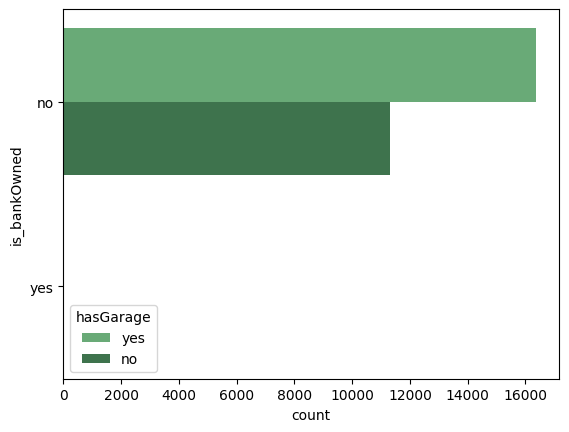

In [154]:
sns.countplot(y="is_bankOwned", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

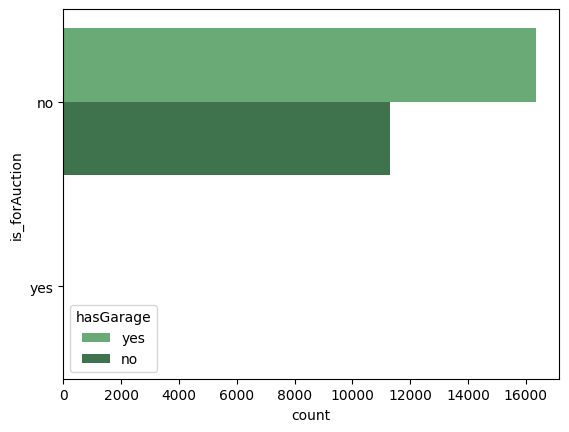

In [155]:
sns.countplot(y="is_forAuction", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

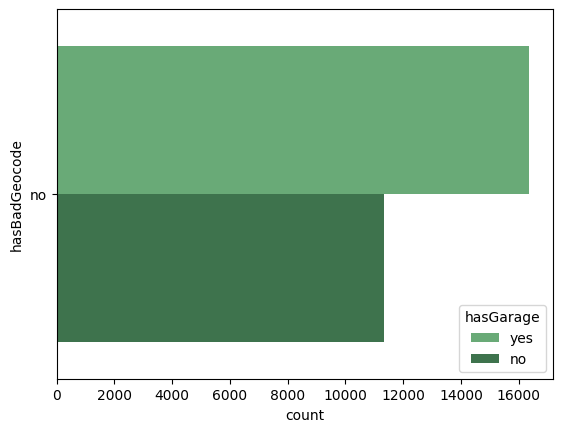

In [156]:
sns.countplot(y="hasBadGeocode", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

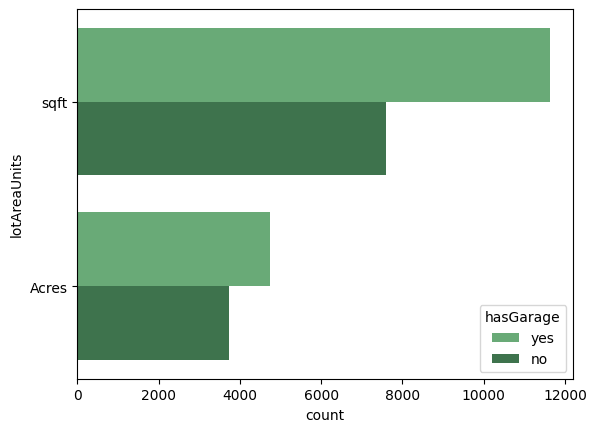

In [157]:
sns.countplot(y="lotAreaUnits", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

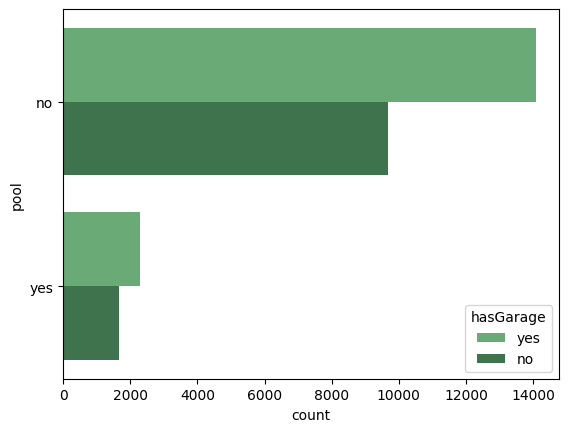

In [158]:
sns.countplot(y="pool", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

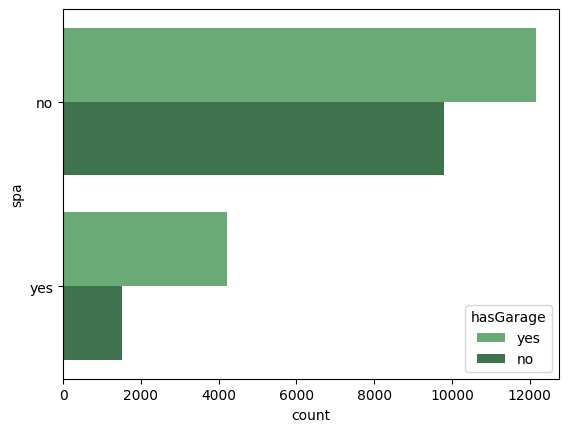

In [159]:
sns.countplot(y="spa", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

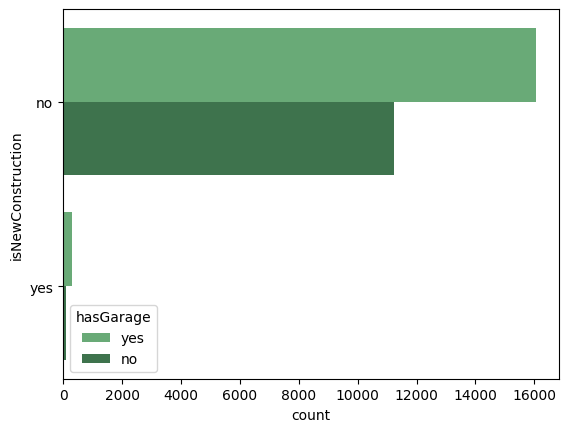

In [160]:
sns.countplot(y="isNewConstruction", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

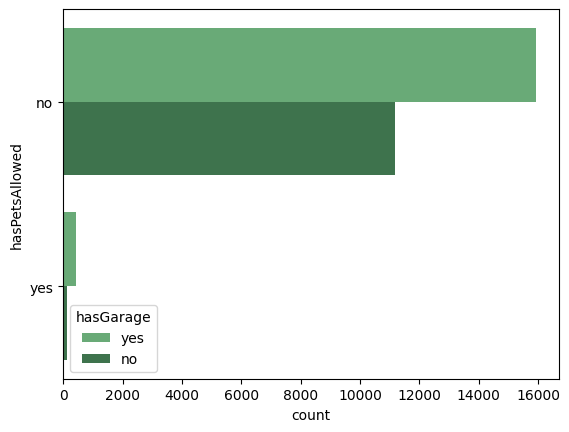

In [161]:
sns.countplot(y="hasPetsAllowed", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

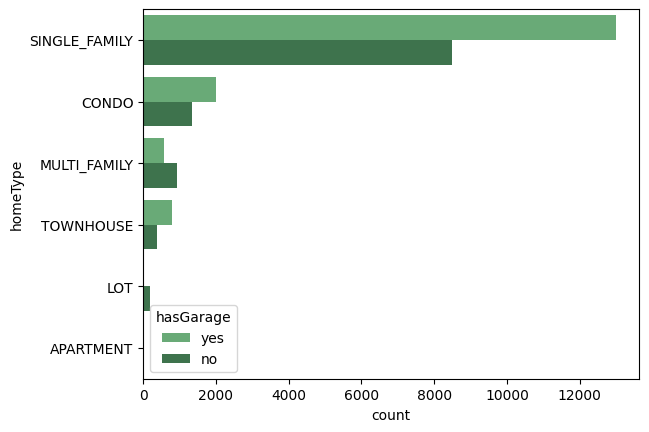

In [162]:
sns.countplot(y="homeType", hue="hasGarage", data=df, palette="Greens_d")
plt.show()

In [163]:
"""Overall, it looks like most of our data are properties that have a garage"""

'Overall, it looks like most of our data are properties that have a garage'

In [165]:
"""Next, we will use normality tests and jarque bera tests to test for normality of distribution
of our raw and winsorized variables. Some machine learning models prefer more normally distributed variables."""

'Next, we will use normality tests and jarque bera tests to test for normality of distribution\nof our raw and winsorized variables. Some machine learning models prefer more normally distributed variables.'

In [166]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df["time"])
norm_stats = normaltest(df["time"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["price"])
norm_stats = normaltest(df["price"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["pricePerSquareFoot"])
norm_stats = normaltest(df["pricePerSquareFoot"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["yearBuilt"])
norm_stats = normaltest(df["yearBuilt"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["livingArea"])
norm_stats = normaltest(df["livingArea"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["livingAreaValue"])
norm_stats = normaltest(df["livingAreaValue"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["bathrooms"])
norm_stats = normaltest(df["bathrooms"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["bedrooms"])
norm_stats = normaltest(df["bedrooms"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["garageSpaces"])
norm_stats = normaltest(df["garageSpaces"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 11546941.593050506 and p value is 0.0
Normality test statistics is 40406.27071373767 and p value is 0.0
Jarque-Bera test statistics is 162340183.08763975 and p value is 0.0
Normality test statistics is 53068.6683210007 and p value is 0.0
Jarque-Bera test statistics is 26914148160.982628 and p value is 0.0
Normality test statistics is 95733.86442768676 and p value is 0.0
Jarque-Bera test statistics is 270114867944.45227 and p value is 0.0
Normality test statistics is 112250.08646748189 and p value is 0.0
Jarque-Bera test statistics is 1039685399.4520855 and p value is 0.0
Normality test statistics is 59179.580914431805 and p value is 0.0
Jarque-Bera test statistics is 1018042350.6362599 and p value is 0.0
Normality test statistics is 59057.25684158832 and p value is 0.0
Jarque-Bera test statistics is 2666102.157839698 and p value is 0.0
Normality test statistics is 22016.18991636506 and p value is 0.0
Jarque-Bera test statistics is 260902428.81870952 and p

In [167]:
"""Due to the p value for both tests being under 0.05 we can see that our raw data is not
normally distributed. Let's perform the same test on our winsorized data."""

"Due to the p value for both tests being under 0.05 we can see that our raw data is not \nnormally distributed. Let's perform the same test on our winsorized data."

In [168]:
jb_stats = jarque_bera(df["win_time"])
norm_stats = normaltest(df["win_time"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_price"])
norm_stats = normaltest(df["win_price"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_pricePerSquareFoot"])
norm_stats = normaltest(df["win_pricePerSquareFoot"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_yearBuilt"])
norm_stats = normaltest(df["win_yearBuilt"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_livingArea"])
norm_stats = normaltest(df["win_livingArea"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_livingAreaValue"])
norm_stats = normaltest(df["win_livingAreaValue"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_bathrooms"])
norm_stats = normaltest(df["win_bathrooms"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_bedrooms"])
norm_stats = normaltest(df["win_bedrooms"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["win_garageSpaces"])
norm_stats = normaltest(df["win_garageSpaces"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 11547429.770385442 and p value is 0.0
Normality test statistics is 40406.54619764746 and p value is 0.0
Jarque-Bera test statistics is 4164.780965039704 and p value is 0.0
Normality test statistics is 3060.632643867379 and p value is 0.0
Jarque-Bera test statistics is 1785.1128655924017 and p value is 0.0
Normality test statistics is 3247.6219541527316 and p value is 0.0
Jarque-Bera test statistics is 1752.1731587239378 and p value is 0.0
Normality test statistics is 1504.6243161110672 and p value is 0.0
Jarque-Bera test statistics is 2067.669517996502 and p value is 0.0
Normality test statistics is 2697.6335605595636 and p value is 0.0
Jarque-Bera test statistics is 2070.202804244657 and p value is 0.0
Normality test statistics is 2702.9046289147345 and p value is 0.0
Jarque-Bera test statistics is 430.7981365812828 and p value is 2.840358994784951e-94
Normality test statistics is 488.56768154986327 and p value is 8.10729420371233e-107
Jarque-Bera test s

In [169]:
"""While bedrooms and bathrooms seem to show a small amount of normality, we still have nothing
that will qualify as a normal distribution of data."""

'While bedrooms and bathrooms seem to show a small amount of normality, we still have nothing\nthat will qualify as a normal distribution of data.'

In [170]:
"""Next, we will do Principle Component Analysis, or PCA

PCA is a widely-used tool for dimensionality reduction, visualization,
noise reduction, and feature extraction."""

'Next, we will do Principle Component Analysis, or PCA'

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [172]:
"""First, we need to normalize the data so that all variables have a mean of 0 and standard deviation
of 1."""

'First, we need to normalize the data so that all variables have a mean of 0 and standard deviation\nof 1.'

In [173]:
X = StandardScaler().fit_transform(df.select_dtypes(include='float64'))

In [174]:
""" The NumPy covariance function assumes that variables are represented by rows,
not columns. So transpose `X`."""

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00003614  0.04626904  0.00442121  0.07681762 -0.10332914  0.10108019
   0.00192244  0.0018536  -0.01139131 -0.01151338  0.03723753 -0.07281972
   0.12759902  0.17456171  1.00003609 -0.00680492 -0.00682462 -0.01872341
  -0.01776472  0.05412671 -0.09028903]
 [ 0.04626904  1.00003614  0.01163885 -0.06740797 -0.04502416 -0.03471934
   0.55970302  0.55809168  0.48790842  0.24668081  0.20531368  0.12212086
   0.52606965  0.38686431  0.04627454  0.37456402  0.3745708   0.26256768
   0.20834119  0.06332917  0.06578253]
 [ 0.00442121  0.01163885  1.00003614 -0.00752372  0.00289536 -0.00564886
  -0.02129003 -0.02124934 -0.02538513 -0.03420342 -0.00641545  0.01817976
   0.02389485  0.0508966   0.00442269 -0.04632219 -0.04632977 -0.03511224
  -0.04641488 -0.00903104  0.00272326]
 [ 0.07681762 -0.06740797 -0.00752372  1.00003614 -0.79288735  0.88157046
  -0.02735533 -0.0275772  -0.05446233  0.02095695  0.13799499 -0.34434755
  -0.11007085 -0.14690601  0.07682517 -0.01045156

In [175]:
"""Next, calculate eigenvalues and eigenvectors"""

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [176]:
"""Next, we can inspect the eigenvalues and eigenvectors."""

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The proportion of total variance in the dataset explained by each',
    'component calculated by hand\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.00052235 -0.23765871  0.0137693   0.05479918 -0.03771423  0.06041205
 -0.31357344 -0.31303525 -0.32903325 -0.26494742 -0.11079174 -0.17375984
 -0.2829229  -0.06316793 -0.00052464 -0.35112626 -0.35124655 -0.29386184
 -0.2681691  -0.04344276 -0.16477416]
Eigenvalue 1: 6.078892554133783
----------------------------------------
Eigenvector 2: 
[-0.14891627 -0.07910687  0.00622793 -0.43491164  0.48457553 -0.47777068
 -0.08665491 -0.08623793  0.00709651 -0.00329913 -0.21566103  0.25032381
 -0.09378215 -0.0639691  -0.14892201 -0.05926936 -0.0592189   0.03520193
  0.01811317 -0.25070957  0.29768219]
Eigenvalue 2: 3.5163181219394835
----------------------------------------
Eigenvector 3: 
[ 0.22276894  0.14403245  0.04973163 -0.20339503  0.06036584 -0.15359343
  0.1052017   0.10501115 -0.18551797 -0.30340458  0.39727411  0.25272957
  0.19188654  0.26212383  0.22276783 -0.03172386 -0.03169114 -0.24492776
 -0.34409678  0.33872666  0.19491643]
Eigenvalue 3: 2.2424604771563152
-

In [177]:
"""Next, we determine ow many components to keep.

Strategy: Keep components with eigenvalues greater than 1, because they add value
(more than a single variable would).

If we use that strategy, we will use eigenvalues: 1, 2, 3, 4, 5, 6, 20

Or...

We can use a scree plot to visually inspect the plot and keep all the components
whose eigenvalue falls above the point where the slope of the line changes the most
drastically. This point is also called the elbow."""

'Next, we determine ow many components to keep.\n\nStrategy: Keep components with eigenvalues greater than 1, because they add value \n(more than a single variable would).\n\nIf we use that strategy, we will use eigenvalues: 1, 2, 3, 4, 5, 6, 20\n\nOr...\n\nWe can use a scree plot to visually inspect the plot and keep all the components \nwhose eigenvalue falls above the point where the slope of the line changes the most \ndrastically. This point is also called the elbow.'

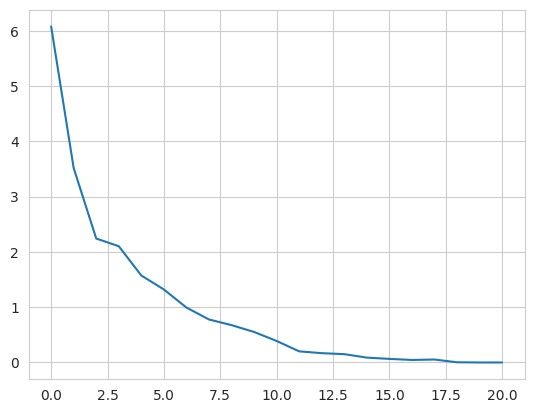

[ 6.07889255e+00  3.51631812e+00  2.24246048e+00  2.10271896e+00
  1.57355372e+00  1.32081167e+00  9.94239569e-01  7.77846473e-01
  6.75904215e-01  5.52335232e-01  3.89212918e-01  2.01411869e-01
  1.68493410e-01  1.50514735e-01  8.82199699e-02  6.49995077e-02
  4.57374752e-02  5.33725661e-02  3.71538252e-03  4.70294056e-08
 -2.44323127e-16]


In [178]:
"""Let's observe the Scree plot to see which method is more valuable."""

# Print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [179]:
"""The scree plot elbow is at 6 on the x-axis, which is how many principal components
we need to keep before the following pricinpal components contribution to explaining
the data is considered minimal."""

'The scree plot elbow is at 6 on the x-axis, which is how many principal components \nwe need to keep before the following pricinpal components contribution to explaining \nthe data is considered minimal.'

In [180]:
"""Now let's confirm with the sklearn PCA method."""

sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform `X` into `Y`.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.28946061 0.16743767 0.10677997 0.10012586 0.07492842 0.06289352
 0.04734303]


In [181]:
"""Now that we have our principal components defined, we will do some modeling. First up, Linear Regression"""

'Now that we have our principal components defined, we will do some modeling. First up, Linear Regression'

In [182]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [185]:
"""First we need to transform all of the categorical
variables into numerical variables with 'get dummies'"""

df["is_bankOwned_num"] = pd.get_dummies(df.is_bankOwned, drop_first=True)
df["is_forAuction_num"] = pd.get_dummies(df.is_forAuction, drop_first=True)
df["hasGarage_num"] = pd.get_dummies(df.hasGarage, drop_first=True)
df["pool_num"] = pd.get_dummies(df.pool, drop_first=True)
df["spa_num"] = pd.get_dummies(df.spa, drop_first=True)
df["isNewConstruction_num"] = pd.get_dummies(df.isNewConstruction, drop_first=True)
df["hasPetsAllowed_num"] = pd.get_dummies(df.hasPetsAllowed, drop_first=True)

In [186]:
"""Let's see how that worked."""

df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,win_bedrooms,win_buildingArea,win_garageSpaces,is_bankOwned_num,is_forAuction_num,hasGarage_num,pool_num,spa_num,isNewConstruction_num,hasPetsAllowed_num
1,1,94564-18496265,9,189,36958,USA,2021-07-12,no,no,Listed for sale,...,3.0,1671.0,2.0,0,0,1,0,0,0,0
2,2,94564-18484475,9,190,36958,USA,2021-07-08,no,no,Listed for sale,...,3.0,1414.0,2.0,0,0,1,0,0,0,0
3,3,94564-18494835,9,191,36958,USA,2021-07-07,no,no,Listed for sale,...,3.0,1336.0,1.0,0,0,1,0,1,0,0
5,5,94564-18484390,9,193,36958,USA,2021-07-06,no,no,Listed for sale,...,3.0,1413.0,2.0,0,0,1,0,0,0,0
6,6,94564-50919342,9,194,36958,USA,2021-07-05,no,no,Listed for sale,...,5.0,1808.0,2.0,0,0,1,0,0,0,0


In [187]:
"""Now let's handle some multiclass categorical data. Let's split up homeType into multiple
numerical variables."""

homeType_df = pd.get_dummies(df['homeType'])
homeType_df.head()

,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0


In [188]:
"""Now let's merge the new numerical version of homeType with the original data"""

df2 = df.drop(['homeType'], axis =1).merge(homeType_df,left_index=True, right_index=True)
df2.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,pool_num,spa_num,isNewConstruction_num,hasPetsAllowed_num,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
1,1,94564-18496265,9,189,36958,USA,2021-07-12,no,no,Listed for sale,...,0,0,0,0,0,0,0,0,1,0
2,2,94564-18484475,9,190,36958,USA,2021-07-08,no,no,Listed for sale,...,0,0,0,0,0,0,0,0,1,0
3,3,94564-18494835,9,191,36958,USA,2021-07-07,no,no,Listed for sale,...,0,1,0,0,0,0,0,0,1,0
5,5,94564-18484390,9,193,36958,USA,2021-07-06,no,no,Listed for sale,...,0,0,0,0,0,0,0,0,1,0
6,6,94564-50919342,9,194,36958,USA,2021-07-05,no,no,Listed for sale,...,0,0,0,0,0,0,0,0,1,0


In [192]:
"""To begin modeling, we will start with number of bathrooms, number of bedrooms and price of
the property using an sklearn model"""

"""`Y` is the target variable"""
Y = df2['price']
"""`X` is the feature set which includes the
# `bathrooms` and `bedrooms` variables"""
X = df2[['bathrooms','bedrooms']]

In [193]:
"""Create a `LinearRegression` model object
from scikit-learn's linear_model module"""
lrm = linear_model.LinearRegression()

"""Fit method estimates the coefficients using OLS"""
lrm.fit(X, Y)

"""Inspect the results"""
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 843182.01505597 -134154.91591899]

Intercept: 
 -449219.026474901


In [194]:
"""Since we get more detailed results of our regression using the statsmodel api,
we will now run another OLS regression that way"""

'Since we get more detailed results of our regression using the statsmodel api,\nwe will now run another OLS regression that way'

In [195]:
import statsmodels.api as sm

"""`Y` is the target variable"""
Y = df2['price']

"""`X` is the feature set"""
X = df2[['bathrooms','bedrooms', 'yearBuilt', 'pool_num']]

In [196]:
"""Add a constant to the model because it's best practice
to do so every time"""
X = sm.add_constant(X)

"""Fit an OLS model using statsmodels"""
results = sm.OLS(Y, X).fit()

"""Print the summary results"""
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     2302.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:19:11   Log-Likelihood:            -4.4037e+05
No. Observations:               27674   AIC:                         8.807e+05
Df Residuals:                   27669   BIC:                         8.808e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.091e+06   4.22e+05      9.704      0.0

In [197]:
"""Now let's evaluate how our model performed.

F-test
By observing the F-test, we can see that our F-statistic is 2302 and the associated p-value is
very close to 0. This means that our feature set does add some information to the reduced model
(or null hypothesis) and the model is useful in explaining 'price'.

R-squared
The R-squared is 0.25, which signals that the model does not make very good predicitons and does
not explain much of the variance in the outcome variable ('price').

Overall, this model did not perform very well at all.

Since there are no hyperparameters to tune, we will move on to test another type of model.
"""

"Now let's evaluate how our model performed.\n\nF-test\nBy observing the F-test, we can see that our F-statistic is 2302 and the associated p-value is\nvery close to 0. This means that our feature set does add some information to the reduced model\n(or null hypothesis) and the model is useful in explaining 'price'.\n\nR-squared\nThe R-squared is 0.25, which signals that the model does not make very good predicitons and does\nnot explain much of the variance in the outcome variable ('price').\n\nOverall, this model did not perform very well at all.\n\nSince there are no hyperparameters to tune, we will move on to test another type of model.\n"

In [198]:
"""Next, we will use a K-nearest neighbors model to evaluate our data.

First, to classify price range that is within the average families budget, we will 'cut'
the price variable into pieces and label them as inBudget, underBudget, or overBudget. then we will
meausure the labels against bedrooms and bathrooms to observe trends. The average family's budget
will be between 400k and 800k in USD."""

df2['priceLabel'] = pd.cut(df2['price'], bins=[0, 400000, 800000, float('Inf')], labels=['underBudget', 'inBudget', 'overBudget'])

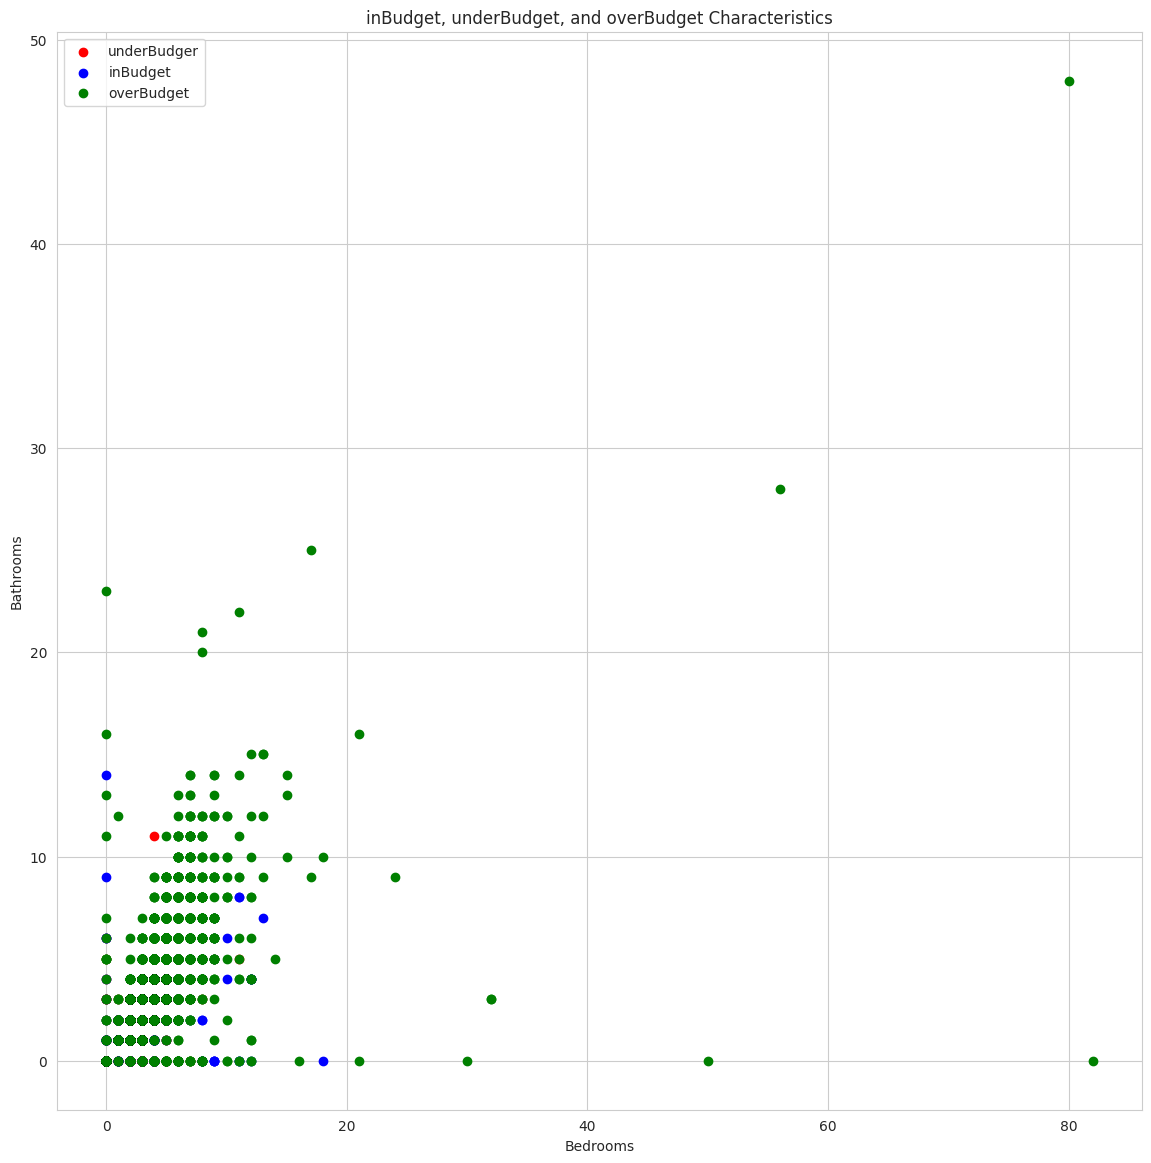

In [199]:
import scipy

"""Now, we will observe the data after cutting the price variable into pieces."""

plt.figure(figsize=(14,14))
plt.scatter(
    df2[df2['priceLabel'] == 'underBudget'].bedrooms,
    df2[df2['priceLabel'] == 'underBudget'].bathrooms,
    color='red'
)
plt.scatter(
    df2[df2['priceLabel'] == 'inBudget'].bedrooms,
    df2[df2['priceLabel'] == 'inBudget'].bathrooms,
    color='blue'
)
plt.scatter(
    df2[df2['priceLabel'] == 'overBudget'].bedrooms,
    df2[df2['priceLabel'] == 'overBudget'].bathrooms,
    color='green'
)
plt.legend(['underBudger', 'inBudget', 'overBudget'])
plt.title('inBudget, underBudget, and overBudget Characteristics')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

In [200]:
"""Most of the houses are over the high end of the budget range, which is $800,000."""

'Most of the houses are over the high end of the budget range, which is $800,000.'

In [201]:
"""Next, we will train a K-Nearest Neighbors model."""

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = df2[['bathrooms', 'bedrooms']]
Y = df2.priceLabel
neighbors.fit(X,Y)

KNeighborsClassifier(n_neighbors=1)

In [202]:
"""Predict for a house with 3 Bathrooms and 4 Bedrooms."""
neighbors.predict([[3, 4]])

array(['overBudget'], dtype=object)

In [203]:
"""Predict for a house with 0 Bathrooms and 6 Bedrooms."""
neighbors.predict([[0, 6]])

array(['overBudget'], dtype=object)

In [204]:
"""Predict for a house with 2 Bathrooms and 3 Bedrooms."""
neighbors.predict([[2, 3]])

array(['overBudget'], dtype=object)

In [205]:
"""Predict for a house with 1 Bathroom and 1 Bedroom."""
neighbors.predict([[1, 1]])

array(['underBudget'], dtype=object)

In [206]:
"""Predict for a house with 2 Bathrooms and 2 Bedrooms."""
neighbors.predict([[2, 2]])

array(['overBudget'], dtype=object)

In [207]:
"""Predict for a house with 1 Bathrooms and 2 Bedrooms."""
neighbors.predict([[1, 2]])

array(['underBudget'], dtype=object)

In [208]:
"""We see that the model returns predictions that are either over $800,000 or under 400,000, but doesn't find any
that are within the budget range of a average family."""

"We see that the model returns predictions that are either over $800,000 or under 400,000, but doesn't find any\nthat are within the budget range of a average family."

In [210]:
"""Now let's tune the model a bit by adjusting the k hyperparameter to 5"""

"Now let's tune the model a bit by adjusting the k parameter to 5"

In [211]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df2[['bathrooms', 'bedrooms']]
Y = df2.priceLabel
neighbors.fit(X,Y)

KNeighborsClassifier()

In [212]:
"""Predict for a house with 3 Bathrooms and 4 Bedrooms."""
neighbors.predict([[3, 4]])

array(['overBudget'], dtype=object)

In [213]:
"""Predict for a house with 0 Bathrooms and 6 Bedrooms."""
neighbors.predict([[0, 6]])

array(['underBudget'], dtype=object)

In [214]:
"""Predict for a house with 2 Bathrooms and 3 Bedrooms."""
neighbors.predict([[2, 3]])

array(['inBudget'], dtype=object)

In [215]:
"""Predict for a house with 1 Bathroom and 1 Bedroom."""
neighbors.predict([[1, 1]])

array(['inBudget'], dtype=object)

In [216]:
"""Predict for a house with 2 Bathrooms and 2 Bedrooms."""
neighbors.predict([[2, 2]])

array(['overBudget'], dtype=object)

In [217]:
"""Predict for a house with 1 Bathrooms and 2 Bedrooms."""
neighbors.predict([[1, 2]])

array(['overBudget'], dtype=object)

In [218]:
"""Based on the KNN model above with k=5 and the sample provided, we can accurately predict that a house with 2 Bathrooms and
3 Bedrooms is considered in-budget for a family with a budget of 400k to 800k to spend on a house."""

'Based on the KNN model above with k=5 and the sample provided, we can accurately predict that a house with 2 Bathrooms and\n3 Bedrooms is considered in-budget for a family with a budget of 400k to 800k to spend on a house.'

In [ ]:
"""Comparing the results of the tested models


Results of Linear Regression Model:

R-squared
The R-squared value from the OLS regression we performed is 0.25, which signals that the
model does not make very good predicitons and does not explain much of the variance in the
outcome variable ('price').

Linear Regression models do not have hyperparameters to tune to improve their performance, so
there was no increase in performance.

Overall, this model did not perform very well.


Results of K-Nearest Neighbors Model:

With k=1, the model was not very helpful in predicting whether a house was under, in, or over budget.
However, when we tuned the k hyperparameter to 5, the model became much more helpful. We found that,
using the model we could reasonably predict that a house with 2 bathrooms and 3 bedrooms
is considered in-budget for a family with a budget of 400k to 800k to spend on a house. This insight
will help the average family narrow their search for a home and tailor their expectations as to
what their options are. Using this model, the average family will be able to do a more in-depth
inquiry into what their options are and what is reasonable to ask for from the housing market that
is described in this dataset, which is from 2021 so is close to current and acurate market conditions.

It is for the reasons listed above that we select the KNN model as the best-performing model.
"""